# Installar apenas uma vez para evitar conflito com a versão antigado do numpy

In [ ]:
# pip install bluepysnap

# Iniciate Collab on gdrive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd '/content/drive/MyDrive/Brain_Matrix/S1_opto_Thal'

/content/drive/MyDrive/Brain_Matrix/S1_opto_Thal


# Install neuron netpyne bluepysnap in the Google collab

In [4]:
pip install pandas==1.5.3 numpy==1.23.5 neuron==8.2.2 netpyne==1.0.5

In [5]:
!nrnivmodl mod2/

/usr/local/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/content/drive/MyDrive/Brain_Matrix/S1_opto_Thal
Mod files: "mod2/mod2//ar_traub.mod" "mod2/mod2//cadad.mod" "mod2/mod2//CaDynamics_DC0.mod" "mod2/mod2//CaDynamics_E2.mod" "mod2/mod2//cadyn.mod" "mod2/mod2//cagk.mod" "mod2/mod2//Ca_HVA2.mod" "mod2/mod2//Ca_HVA.mod" "mod2/mod2//cal_mh.mod" "mod2/mod2//cal_mig.mod" "mod2/mod2//Ca_LVAst.mod" "mod2/mod2//Ca.mod" "mod2/mod2//cancr.mod" "mod2/mod2//canin.mod" "mod2/mod2//can_mig.mod" "mod2/mod2//catcb.mod" "mod2/mod2//cat_mig.mod" "mod2/mod2//cat_traub.mod" "mod2/mod2//ch_CavL.mod" "mod2/mod2//ch_CavN.mod" "mod2/mod2//ch_KCaS.mod" "mod2/mod2//ch_Kdrfastngf.mod" "mod2/mod2//ch_KvAngf.mod" "mod2/mod2//ch_KvCaB.mod" "mod2/mod2//ch_leak.mod" "mod2/mod2//ch_Navngf.mod" "mod2/mod2//DetAMPANMDA.mod" "mod2/mod2//DetGABAAB.mod" "mod2/mod2//gabab.mod" "mod2/mod2//h_B

# Load cells info


In [24]:
import numpy as np
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
from bluepysnap import Circuit
from bluepysnap.bbp import Cell

CircuitPath = 'O1_data_physiology/' # edges files not inclued in https://github.com/FernandoSBorges/
circuit_path = CircuitPath + 'circuit_config.json'
circuit = Circuit(circuit_path)
cells = circuit.nodes["S1nonbarrel_neurons"]
nodesinfo = cells.get()

%matplotlib inline

In [25]:
nodesinfo[nodesinfo['layer'] == '4'].head()

,etype,exc_mini_frequency,hexagon,inh_mini_frequency,layer,me_combo,model_template,model_type,morph_class,morphology,...,x,x_new,y,y_new,z,z_new,@dynamics:holding_current,@dynamics:input_resistance,@dynamics:resting_potential,@dynamics:threshold_current
node_ids,,,,,,,,,,,,,,,,,,,,,
108727,dSTUT,0.010108,2,0.233243,4,dSTUT_L4BP_L4_BP_4_C300797C-I1_-_Scale_x1.000_...,hoc:dSTUT_L4BP,biophysical,INT,C300797C-I1_-_Scale_x1.000_y0.975_z1.000_-_Clo...,...,3918.383222,345.100991,-882.079924,368.523207,-1946.094942,1431.980963,-0.048744,103.355850,-77.048584,0.092756
108728,bAC,0.010108,1,0.233243,4,bAC_L23BTC_L4_BP_4_rp140319_ChC_3_idA_-_Scale_...,hoc:bAC_L23BTC,biophysical,INT,rp140319_ChC_3_idA_-_Scale_x1.000_y0.975_z1.00...,...,4140.810336,179.239589,-766.305463,605.707003,-2090.662966,1435.342921,-0.011682,606.258118,-76.392754,0.024155
108729,cNAC,0.010108,0,0.233243,4,cNAC_L6NGC_L4_BP_4_C300797C-I1_-_Scale_x1.000_...,hoc:cNAC_L6NGC,biophysical,INT,C300797C-I1_-_Scale_x1.000_y0.950_z1.000_-_Clo...,...,3953.899058,722.166787,-1279.341226,593.262166,-2143.970161,1357.507449,-0.025396,385.013672,-74.105980,0.033770
108730,cACint,0.010108,0,0.233243,4,cACint_L4CHC_L4_BP_4_rp140319_ChC_3_idA_-_Scal...,hoc:cACint_L4CHC,biophysical,INT,rp140319_ChC_3_idA_-_Scale_x1.000_y0.975_z1.00...,...,4214.386218,740.411420,-1362.666051,842.778874,-2201.251811,1481.951494,-0.014442,636.180054,-73.075333,0.015156
108731,cACint,0.010108,0,0.233243,4,cACint_L4CHC_L4_BP_4_rp140319_ChC_3_idA_-_Scal...,hoc:cACint_L4CHC,biophysical,INT,rp140319_ChC_3_idA_-_Scale_x1.000_y1.025_z1.00...,...,4184.420803,714.604811,-1328.656268,916.399225,-2366.952165,1328.898361,-0.014949,620.984924,-72.957344,0.015535


In [26]:
nodesinfo.keys()

Index(['etype', 'exc_mini_frequency', 'hexagon', 'inh_mini_frequency', 'layer',
       'me_combo', 'model_template', 'model_type', 'morph_class', 'morphology',
       'mtype', 'orientation_w', 'orientation_x', 'orientation_y',
       'orientation_z', 'region', 'synapse_class', 'x', 'x_new', 'y', 'y_new',
       'z', 'z_new', '@dynamics:holding_current', '@dynamics:input_resistance',
       '@dynamics:resting_potential', '@dynamics:threshold_current'],
      dtype='object')

In [27]:
def distance3D(gidpre,gidpost):
    return np.sqrt(np.power(nodesinfo['x'][gidpre]-nodesinfo['x'][gidpost],2)+np.power(nodesinfo['y'][gidpre]-nodesinfo['y'][gidpost],2)+np.power(nodesinfo['z'][gidpre]-nodesinfo['z'][gidpost],2))

def distance2D(gidpre,gidpost):
    return np.sqrt(np.power(nodesinfo['x'][gidpre]-nodesinfo['x'][gidpost],2)+np.power(nodesinfo['y'][gidpre]-nodesinfo['y'][gidpost],2))

def distance2Dmean(gidpre, mean_x, mean_y):
    return np.sqrt(np.power(nodesinfo['x_new'][gidpre]-mean_x,2)+np.power(nodesinfo['y_new'][gidpre]-mean_y,2))

print(cells.property_values(Cell.REGION))

mtypes = sorted(cells.property_values(Cell.MTYPE))

i = 0
mntypes = {}
for mn in sorted(mtypes):
    mntypes[mn] = i
    i+=1

{'S1J', 'S1FL', 'S1DZ'}


In [64]:
f = open('node_sets.json')
node_sets = json.load(f)

mean_x, mean_y = np.mean(nodesinfo['x_new']), np.mean(nodesinfo['y_new'])
node_gid = []
nodepremtype_new = []
mtype_new = []


node_gid = []
hoclist = []
Morpholist = []
node_threshold_current = []
node_holding_current = []


hex = 'hex0'
for gid in node_sets['hex0']['node_id']:
# for gid in [117619, 142340, 142768, 142891, 141786,138337, 142077, 138315, 141829, 142671, 142352, 138475, 141536, 142859, 142058, 142814]:
# for gid in [141766, 138220, 108767, 108729, 108749, 138433, 141757, 141803, 138337]:
    if 'L4_' in nodesinfo['mtype'][gid] and distance2Dmean(gid, mean_x, mean_y) > 0.0 and distance2Dmean(gid, mean_x, mean_y) < 25.0 and 'EXC' in nodesinfo['synapse_class'][gid]:
        nodepremtype_new.append(mntypes[nodesinfo['mtype'][gid]])
        if nodesinfo['mtype'][gid] not in mtype_new:
            mtype_new.append(nodesinfo['mtype'][gid])

        # print(len(node_gid),gid,nodesinfo['synapse_class'][gid],nodesinfo['mtype'][gid],nodesinfo['model_template'][gid],nodesinfo['morphology'][gid],hex,distance2Dmean(gid, mean_x, mean_y))
        print("%d \t%d %s %s %.4f %.2f %.4f %.2f" % (len(node_gid),gid,nodesinfo['synapse_class'][gid],nodesinfo['mtype'][gid], 
                                                     nodesinfo['@dynamics:threshold_current'][gid],nodesinfo['@dynamics:resting_potential'][gid],
                                                     nodesinfo['@dynamics:holding_current'][gid],nodesinfo['@dynamics:input_resistance'][gid]))

        current1 = cells.get(gid,['@dynamics:threshold_current']).values[0]
        holding_current1 = cells.get(gid,['@dynamics:holding_current']).values[0]
        # print("%d %.5f %.5f" % (gid,current1,holding_current1))

        node_gid.append(gid)
        hoclist.append(nodesinfo['model_template'][gid][4:])
        Morpholist.append(nodesinfo['morphology'][gid])
        node_threshold_current.append(current1)
        node_holding_current.append(holding_current1)



# non central col
# for hex in node_sets['hex_O1']:
#     for gid in node_sets[hex]['node_id']:
#         if 'L4' in nodesinfo['mtype'][gid] and distance2Dmean(gid, mean_x, mean_y) > 500.0 and distance2Dmean(gid, mean_x, mean_y) < 502.0:
#             node_gid.append(gid)
#             nodepremtype_new.append(mntypes[nodesinfo['mtype'][gid]])
#             if nodesinfo['mtype'][gid] not in mtype_new:
#                 mtype_new.append(nodesinfo['mtype'][gid])

#             print(len(node_gid),gid,nodesinfo['mtype'][gid],hex,distance2Dmean(gid, mean_x, mean_y))

0 	109126 EXC L4_UPC 0.1281 -78.55 -0.0562 127.30
1 	109354 EXC L4_UPC 0.0788 -76.18 -0.0505 204.69
2 	109632 EXC L4_UPC 0.0970 -78.87 -0.0418 160.13
3 	112531 EXC L4_UPC 0.1311 -76.17 -0.0749 141.17
4 	112935 EXC L4_UPC 0.0928 -78.84 -0.0403 166.91
5 	113019 EXC L4_UPC 0.0576 -77.44 -0.0304 276.21
6 	113207 EXC L4_UPC 0.1163 -78.05 -0.0556 137.93
7 	113680 EXC L4_UPC 0.2364 -74.86 -0.1595 79.30
8 	114264 EXC L4_UPC 0.1887 -77.59 -0.0877 91.97
9 	114284 EXC L4_UPC 0.2849 -75.19 -0.1723 70.51
10 	114352 EXC L4_UPC 0.2910 -74.48 -0.1830 68.20
11 	114599 EXC L4_UPC 0.0455 -77.41 -0.0281 307.08
12 	115007 EXC L4_UPC 0.1212 -75.28 -0.0840 146.57
13 	116011 EXC L4_UPC 0.2440 -78.16 -0.1042 72.57
14 	116420 EXC L4_UPC 0.0849 -75.68 -0.0552 195.58
15 	117199 EXC L4_UPC 0.0349 -79.38 -0.0158 378.25
16 	118008 EXC L4_TPC 0.2137 -77.71 -0.1009 79.63
17 	118052 EXC L4_TPC 0.0538 -79.18 -0.0232 265.63
18 	118445 EXC L4_TPC 0.2743 -77.77 -0.1250 64.27
19 	118551 EXC L4_TPC 0.1364 -75.18 -0.0918 127.

# Testing over all reconstruct cells

In [65]:
from netpyne import specs, sim

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

In [66]:
cellName_list = {}
cellName_list2 = []
gid_list = {}

Epops = []
Ipops = []

cellName_list2 = []

# node_gid = [139867, 141213, 141369, 133426, 135956, 137858, 114264, 114284, 115007]

node_gid

for gid in node_gid:
# for gid in [108767, 141766, 138433, 139867, 141213, 141369, 133426, 135956, 137858, 114264, 114284, 115007]:
# for gid in [108767, 141766, 138433, 141213, 133426, 135956,  137858, 114264]:
# for gid in [114264]:

    cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid]

    cellName_list2.append(cellName)

    cellName_list[gid] = cellName + '_' + str(len(cellName_list2)-1)
    gid_list[cellName + '_' + str(len(cellName_list2)-1)] = gid

    print('%s %s %s 1 1 %d' % (cellName + '_' + str(len(cellName_list2)-1),nodesinfo['mtype'][gid],nodesinfo['etype'][gid],gid))

    if 'cADpyr' in cellName:
        Epops.append(cellName + '_' + str(len(cellName_list2)-1))
    else:
        Ipops.append(cellName + '_' + str(len(cellName_list2)-1))

L4_UPC_cADpyr_0 L4_UPC cADpyr 1 1 109126
L4_UPC_cADpyr_1 L4_UPC cADpyr 1 1 109354
L4_UPC_cADpyr_2 L4_UPC cADpyr 1 1 109632
L4_UPC_cADpyr_3 L4_UPC cADpyr 1 1 112531
L4_UPC_cADpyr_4 L4_UPC cADpyr 1 1 112935
L4_UPC_cADpyr_5 L4_UPC cADpyr 1 1 113019
L4_UPC_cADpyr_6 L4_UPC cADpyr 1 1 113207
L4_UPC_cADpyr_7 L4_UPC cADpyr 1 1 113680
L4_UPC_cADpyr_8 L4_UPC cADpyr 1 1 114264
L4_UPC_cADpyr_9 L4_UPC cADpyr 1 1 114284
L4_UPC_cADpyr_10 L4_UPC cADpyr 1 1 114352
L4_UPC_cADpyr_11 L4_UPC cADpyr 1 1 114599
L4_UPC_cADpyr_12 L4_UPC cADpyr 1 1 115007
L4_UPC_cADpyr_13 L4_UPC cADpyr 1 1 116011
L4_UPC_cADpyr_14 L4_UPC cADpyr 1 1 116420
L4_UPC_cADpyr_15 L4_UPC cADpyr 1 1 117199
L4_TPC_cADpyr_16 L4_TPC cADpyr 1 1 118008
L4_TPC_cADpyr_17 L4_TPC cADpyr 1 1 118052
L4_TPC_cADpyr_18 L4_TPC cADpyr 1 1 118445
L4_TPC_cADpyr_19 L4_TPC cADpyr 1 1 118551
L4_TPC_cADpyr_20 L4_TPC cADpyr 1 1 118903
L4_TPC_cADpyr_21 L4_TPC cADpyr 1 1 119782
L4_TPC_cADpyr_22 L4_TPC cADpyr 1 1 120403
L4_TPC_cADpyr_23 L4_TPC cADpyr 1 1 121387
L4

In [67]:
cellsList = {}

for cellName in gid_list.keys():
    # try:
        gid = gid_list[cellName]

        MorphoName = nodesinfo['morphology'][gid] + '.asc'

        hocName = nodesinfo['model_template'][gid][4:]

        MorphologyPath = 'O1_data_physiology/morphologies/ascii'

        # MorphoName = nodesinfo['morphology'][gid]+"_gid"+str(gid)+".asc"

        print(cellName,hocName)

        cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=True,
            conds={'cellType': cellName, 'cellModel': 'HH_full'},
            fileName='O1_data_physiology/emodels_hoc/' + hocName + '.hoc',
            cellName=hocName,
            cellInstance = False,
            cellArgs=[gid, MorphologyPath, MorphoName])

        # netParams.saveCellParamsRule(label=cellName, fileName=cellName+'_BBP_cellParams.json')


        # netParams.cellParams[cellName]['secs']['axon_0']['geom']['Ra'] = 2.0*netParams.cellParams[cellName]['secs']['axon_0']['geom']['Ra']

        cellsList[cellName] = [{'x': nodesinfo['x'][gid], 'y': nodesinfo['y'][gid], 'z': nodesinfo['z'][gid]}]
        # cellsList[cellName] = [{'x': nodesinfo['x'][gid] - 3000.0, 'y': nodesinfo['y'][gid] + 2000.0, 'z': nodesinfo['z'][gid] + 3500.0}]

        cellMe = cellName

        axon_pt3d_x, axon_pt3d_y, axon_pt3d_z, soma_pt3d_diam =  netParams.cellParams[cellMe]['secs']['soma_0']['geom']['pt3d'][-1]

        netParams.cellParams[cellMe]['secs']['axon_0']['geom']['diam'] = 1.0
        # netParams.cellParams[cellMe]['secs']['axon_0']['geom']['L'] = 30.0

        axon_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_0']['geom']['diam']
        axon_pt3d_L =  netParams.cellParams[cellMe]['secs']['axon_0']['geom']['L']

        netParams.cellParams[cellMe]['secs']['axon_0']['geom']['pt3d'] = [(axon_pt3d_x, axon_pt3d_y, axon_pt3d_z, axon_pt3d_diam),
                                                                                    (axon_pt3d_x, axon_pt3d_y+axon_pt3d_L/2.0, axon_pt3d_z, axon_pt3d_diam),
                                                                                    (axon_pt3d_x, axon_pt3d_y+axon_pt3d_L, axon_pt3d_z, axon_pt3d_diam)]



        axon1_pt3d_x, axon1_pt3d_y, axon1_pt3d_z, axon_0_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_0']['geom']['pt3d'][-1]

        # netParams.cellParams[cellMe]['secs']['axon_1']['geom']['diam'] = 0.5
        # netParams.cellParams[cellMe]['secs']['axon_1']['geom']['L'] = 30.0

        axon1_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_1']['geom']['diam']
        axon1_pt3d_L =  netParams.cellParams[cellMe]['secs']['axon_1']['geom']['L']

        netParams.cellParams[cellMe]['secs']['axon_1']['geom']['pt3d'] = [(axon1_pt3d_x, axon1_pt3d_y, axon1_pt3d_z, axon1_pt3d_diam),
                                                                                    (axon1_pt3d_x, axon1_pt3d_y+axon1_pt3d_L/2.0, axon1_pt3d_z, axon1_pt3d_diam),
                                                                                    (axon1_pt3d_x, axon1_pt3d_y+axon1_pt3d_L, axon1_pt3d_z, axon1_pt3d_diam)]



        myelin_pt3d_x, myelin_pt3d_y, myelin_pt3d_z, axon_1_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_1']['geom']['pt3d'][-1]

        # netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['diam'] = 0.5
        netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['L'] = 100.0

        myelin_pt3d_diam =  netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['diam']
        myelin_pt3d_L =  netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['L']

        netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['pt3d'] = [(myelin_pt3d_x, myelin_pt3d_y, myelin_pt3d_z, myelin_pt3d_diam),
                                                                                    (myelin_pt3d_x, myelin_pt3d_y+myelin_pt3d_L/2.0, myelin_pt3d_z, myelin_pt3d_diam),
                                                                                    (myelin_pt3d_x, myelin_pt3d_y+myelin_pt3d_L, myelin_pt3d_z, myelin_pt3d_diam)]

    # except:
    #     pass

# cellsList

L4_UPC_cADpyr_0 cADpyr_L4TPC
L4_UPC_cADpyr_1 cADpyr_L4UPC
L4_UPC_cADpyr_2 cADpyr_L4TPC
L4_UPC_cADpyr_3 cADpyr_L4UPC
L4_UPC_cADpyr_4 cADpyr_L4TPC
L4_UPC_cADpyr_5 cADpyr_L4UPC
L4_UPC_cADpyr_6 cADpyr_L4TPC
L4_UPC_cADpyr_7 cADpyr_L4UPC
L4_UPC_cADpyr_8 cADpyr_L4TPC
L4_UPC_cADpyr_9 cADpyr_L4UPC
L4_UPC_cADpyr_10 cADpyr_L4UPC
L4_UPC_cADpyr_11 cADpyr_L4UPC
L4_UPC_cADpyr_12 cADpyr_L4UPC
L4_UPC_cADpyr_13 cADpyr_L4TPC
L4_UPC_cADpyr_14 cADpyr_L4UPC
L4_UPC_cADpyr_15 cADpyr_L4TPC
L4_TPC_cADpyr_16 cADpyr_L4TPC
L4_TPC_cADpyr_17 cADpyr_L4TPC
L4_TPC_cADpyr_18 cADpyr_L4TPC
L4_TPC_cADpyr_19 cADpyr_L4UPC
L4_TPC_cADpyr_20 cADpyr_L4TPC
L4_TPC_cADpyr_21 cADpyr_L4UPC
L4_TPC_cADpyr_22 cADpyr_L4UPC
L4_TPC_cADpyr_23 cADpyr_L4UPC
L4_TPC_cADpyr_24 cADpyr_L4TPC
L4_TPC_cADpyr_25 cADpyr_L4TPC
L4_TPC_cADpyr_26 cADpyr_L4TPC
L4_TPC_cADpyr_27 cADpyr_L4UPC
L4_TPC_cADpyr_28 cADpyr_L4TPC
L4_TPC_cADpyr_29 cADpyr_L4UPC
L4_TPC_cADpyr_30 cADpyr_L4TPC
L4_TPC_cADpyr_31 cADpyr_L4TPC
L4_TPC_cADpyr_32 cADpyr_L4TPC
L4_TPC_cADpyr_33 cAD

In [68]:
# https://github.com/suny-downstate-medical-center/S1_mouse
# Layer	     height	  from	  to
# L1         0.089      0.000	0.089
# L2         0.070      0.089	0.159
# L3         0.128      0.159	0.286
# L4         0.134      0.286	0.421
# L5         0.263      0.421	0.684
# L6         0.316      0.684	1.000
# L23        0.198      0.089	0.286
# All     1378.8 um

layer = {'1':[0.0, 0.089], '2': [0.089,0.159], '3': [0.159,0.286], '23': [0.089,0.286], '4':[0.286,0.421], '5': [0.421,0.684], '6': [0.684,1.0],
'longS1': [2.2,2.3], 'longS2': [2.3,2.4]}  # normalized layer boundaries

#Th pop
ymin={'ss_RTN_o': 1688, 'ss_RTN_m': 1766, 'ss_RTN_i': 1844, 'VPL_sTC': 2000, 'VPM_sTC': 2156, 'POm_sTC_s1': 2312}
ymax={'ss_RTN_o': 1766, 'ss_RTN_m': 1844, 'ss_RTN_i': 2000, 'VPL_sTC': 2156, 'VPM_sTC': 2312, 'POm_sTC_s1': 2624}

#------------------------------------------------------------------------------
# General network parameters
#------------------------------------------------------------------------------
netParams.scale = 1.0 # Scale factor for number of cells
netParams.sizeX = 50.0 # x-dimension (horizontal length) size in um
netParams.sizeY = 1378.8 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 50.0 # z-dimension (horizontal depth) size in um
netParams.shape = 'cylinder' # cylindrical (column-like) volume
netParams.rotateCellsRandomly = True

netParams.defaultThreshold = -20.0 # spike threshold, 10 mV is NetCon default, lower it for all cells
netParams.defaultDelay = 0.1 # default conn delay (ms)
netParams.propVelocity = 300.0 #  300 μm/ms (Stuart et al., 1997)
netParams.scaleConnWeightNetStims = 0.001  # weight conversion factor (from nS to uS)

#------------------------------------------------------------------------------
# load data from S1 Raster
#------------------------------------------------------------------------------
for metype in netParams.cellParams.keys():
    layernumber = metype[1:2]
    if layernumber == '2':
        netParams.popParams[metype] = {'cellType': metype, 'cellModel': 'HH_full', 'ynormRange': layer['23'],
                                            'numCells':1, 'diversity': True}
    else:
        netParams.popParams[metype] = {'cellType': metype, 'cellModel': 'HH_full', 'ynormRange': layer[layernumber],
                                            'numCells': 1, 'diversity': True}

In [69]:
netParams.popParams.keys()

odict_keys(['L4_UPC_cADpyr_0', 'L4_UPC_cADpyr_1', 'L4_UPC_cADpyr_2', 'L4_UPC_cADpyr_3', 'L4_UPC_cADpyr_4', 'L4_UPC_cADpyr_5', 'L4_UPC_cADpyr_6', 'L4_UPC_cADpyr_7', 'L4_UPC_cADpyr_8', 'L4_UPC_cADpyr_9', 'L4_UPC_cADpyr_10', 'L4_UPC_cADpyr_11', 'L4_UPC_cADpyr_12', 'L4_UPC_cADpyr_13', 'L4_UPC_cADpyr_14', 'L4_UPC_cADpyr_15', 'L4_TPC_cADpyr_16', 'L4_TPC_cADpyr_17', 'L4_TPC_cADpyr_18', 'L4_TPC_cADpyr_19', 'L4_TPC_cADpyr_20', 'L4_TPC_cADpyr_21', 'L4_TPC_cADpyr_22', 'L4_TPC_cADpyr_23', 'L4_TPC_cADpyr_24', 'L4_TPC_cADpyr_25', 'L4_TPC_cADpyr_26', 'L4_TPC_cADpyr_27', 'L4_TPC_cADpyr_28', 'L4_TPC_cADpyr_29', 'L4_TPC_cADpyr_30', 'L4_TPC_cADpyr_31', 'L4_TPC_cADpyr_32', 'L4_TPC_cADpyr_33', 'L4_TPC_cADpyr_34', 'L4_TPC_cADpyr_35', 'L4_TPC_cADpyr_36', 'L4_TPC_cADpyr_37', 'L4_TPC_cADpyr_38', 'L4_TPC_cADpyr_39', 'L4_TPC_cADpyr_40', 'L4_TPC_cADpyr_41', 'L4_TPC_cADpyr_42', 'L4_TPC_cADpyr_43', 'L4_TPC_cADpyr_44', 'L4_TPC_cADpyr_45', 'L4_TPC_cADpyr_46', 'L4_TPC_cADpyr_47', 'L4_TPC_cADpyr_48', 'L4_TPC_cADpyr_49'

In [70]:
#------------------------------------------------------------------------------
#
# SIMULATION CONFIGURATION
#
#------------------------------------------------------------------------------

cfg = specs.SimConfig()					            # object of class SimConfig to store simulation configuration

cfg.coreneuron = False

#------------------------------------------------------------------------------
# Run parameters
#------------------------------------------------------------------------------
cfg.duration = 1.3*1e4 ## Duration of the sim, in ms
cfg.dt = 0.05
cfg.seeds = {'cell': 4321, 'conn': 4321, 'stim': 1000, 'loc': 4321}
cfg.hParams = {'celsius': 34, 'v_init': -84.0}
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True
cfg.cvode_active = False
cfg.cvode_atol = 1e-6
cfg.cache_efficient = True
cfg.printRunTime = 0.1

cfg.includeParamsLabel = False
cfg.printPopAvgRates = True
cfg.checkErrors = False

#--------------------------------------------------------------------------
# Recording
#--------------------------------------------------------------------------
cfg.recordCells = list(netParams.popParams.keys())
# cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'}}  ## Dict with traces to record
cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'},
                    # 'V_axon_0': {'sec':'axon_0', 'loc':0.5, 'var':'v'},
                    # 'V_axon_1': {'sec':'axon_1', 'loc':0.5, 'var':'v'},
                    # 'V_myelin_0': {'sec':'myelin_0', 'loc':0.5, 'var':'v'},
                    # 'V_axon_15': {'sec':'axon_15', 'loc':0.5, 'var':'v'},
                    # 'V_apic_0': {'sec':'apic_0', 'loc':0.5, 'var':'v'},
                    # 'V_apic_7': {'sec':'apic_7', 'loc':0.5, 'var':'v'},
                    # 'V_apic_64': {'sec':'apic_64', 'loc':0.5, 'var':'v'},
                    # 'V_apic_86': {'sec':'apic_86', 'loc':0.5, 'var':'v'},
                    # 'V_dend_0': {'sec':'dend_0', 'loc':0.5, 'var':'v'},
                    # 'V_dend_5': {'sec':'dend_5', 'loc':0.5, 'var':'v'},
                    }
cfg.recordStim = False
cfg.recordTime = False
cfg.recordStep = 0.05

#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.simLabel = 'v0_batch0'       #   + str(cfg.cynradNumber)
cfg.saveFolder = 'exploration/data/'+cfg.simLabel
# cfg.filename =                	## Set file output name
cfg.savePickle = False	        	## Save pkl file
cfg.saveJson = False           	## Save json file
cfg.saveDataInclude = ['simData', 'simConfig', 'net', 'netParams'] ## ['simData'] ##  ['simData'] ##, , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##
cfg.gatherOnlySimData = False	##
cfg.saveCellSecs = True
cfg.saveCellConns = True

#------------------------------------------------------------------------------
# Analysis and plotting
# ------------------------------------------------------------------------------
cfg.analysis['plotRaster'] = {'include': cfg.recordCells, 'saveFig': True, 'showFig': False,'orderInverse': True, 'timeRange': [0,cfg.duration], 'figSize': (12,4), 'fontSize':4, 'markerSize':4, 'marker': 'o', 'dpi': 300}
# cfg.analysis['plot2Dnet']   = {'include': ['presyn_L23_PC_cAD','presyn_L5_TTPC2_cAD', 'presyn_VPM_sTC','L23_PC_cAD','L5_TTPC2_cAD'],'saveFig': True, 'showConns': False, 'figSize': (24,24), 'view': 'xz', 'fontSize':16}   # Plot 2D cells xy
# cfg.analysis['plotTraces'] = {'include': cfg.recordCells, 'oneFigPer': 'trace', 'overlay': True, 'timeRange': [0,cfg.duration], 'ylim': [-100,50], 'saveFig': True, 'showFig': False, 'figSize':(24,24)}

cfg.analysis['plotTraces'] = {'include': cfg.recordCells, 'oneFigPer': 'trace', 'overlay': True, 'timeRange': [0,cfg.duration], 'saveFig': False, 'showFig': True, 'figSize':(24,4)} # , 'ylim': [-90,30] Plot recorded traces for this list of cells
# cfg.analysis['plotShape'] = {'includePre':  [ii for ii in range(10)],'includePre':  [ii for ii in range(10)], 'saveFig': True, 'showFig': True, 'figSize':(12,12)}


In [71]:
for gid in node_gid: # list_pre:

    popName1 = cellName_list[gid]
    current1 = 1.0*cells.get(gid,['@dynamics:threshold_current']).values[0]
    holding_current1 = cells.get(gid,['@dynamics:holding_current']).values[0]

    # current1 = 0.3
    # holding_current1 = 0.0

    # netParams.stimSourceParams['Input_'+str(gid)] = {'type': 'IClamp', 'del': 0.0, 'dur': 2000.0, 'amp': holding_current1}
    # netParams.stimSourceParams['Inputb_'+str(gid)] = {'type': 'IClamp', 'del': 550.0, 'dur': 600.0, 'amp':current1}

    # netParams.stimTargetParams['Input->'+str(gid)] = {'source': 'Input_'+str(gid), 'sec':'soma_0', 'loc': 0.5, 'conds': {'pop':popName1}}
    # netParams.stimTargetParams['Inputb->'+str(gid)] = {'source': 'Inputb_'+str(gid), 'sec':'soma_0', 'loc': 0.5, 'conds': {'pop':popName1}}

    for i,current1 in enumerate([-0.100, -0.060, 0.060, 0.070, 0.100, 0.200, current1+holding_current1, current1, 0.010, -0.100]):
        netParams.stimSourceParams['Input_'+str(gid)+'_'+str(i)] = {'type': 'IClamp', 'del': 550.0 + i*1000.0, 'dur': 600.0, 'amp': current1}
        netParams.stimTargetParams['Input->'+str(gid)+'_'+str(i)] = {'source': 'Input_'+str(gid)+'_'+str(i), 'sec':'soma_0', 'loc': 0.5, 'conds': {'pop':popName1}}


In [106]:
netParams.stimSourceParams

{Input_109126_0: {'type': 'IClamp', 'del': 550.0, 'dur': 600.0, 'amp': -0.1}, Input_109126_1: {'type': 'IClamp', 'del': 1550.0, 'dur': 600.0, 'amp': -0.06}, Input_109126_2: {'type': 'IClamp', 'del': 2550.0, 'dur': 600.0, 'amp': 0.06}, Input_109126_3: {'type': 'IClamp', 'del': 3550.0, 'dur': 600.0, 'amp': 0.07}, Input_109126_4: {'type': 'IClamp', 'del': 4550.0, 'dur': 600.0, 'amp': 0.1}, Input_109126_5: {'type': 'IClamp', 'del': 5550.0, 'dur': 600.0, 'amp': 0.2}, Input_109126_6: {'type': 'IClamp', 'del': 6550.0, 'dur': 600.0, 'amp': 0.07184842595316329}, Input_109126_7: {'type': 'IClamp', 'del': 7550.0, 'dur': 600.0, 'amp': 0.12807031249999998}, Input_109126_8: {'type': 'IClamp', 'del': 8550.0, 'dur': 600.0, 'amp': 0.01}, Input_109126_9: {'type': 'IClamp', 'del': 9550.0, 'dur': 600.0, 'amp': -0.1}, Input_109354_0: {'type': 'IClamp', 'del': 550.0, 'dur': 600.0, 'amp': -0.1}, Input_109354_1: {'type': 'IClamp', 'del': 1550.0, 'dur': 600.0, 'amp': -0.06}, Input_109354_2: {'type': 'IClamp', 

In [73]:
# #------------------------------------------------------------------------------
# # Current inputs
# #------------------------------------------------------------------------------
# cfg.addIClamp = True  # decrease the transient

# cfg.IClamp = []
# cfg.IClampnumber = 0

# for pop in Epops:
#   cfg.IClamp.append({'pop': pop, 'sec': 'soma', 'loc': 0.5, 'start': 550, 'dur': 600, 'amp': 0.2}) #pA
#   cfg.IClampnumber=cfg.IClampnumber+1

# for pop in Epops:
#   cfg.IClamp.append({'pop': pop, 'sec': 'soma', 'loc': 0.5, 'start': 0, 'dur': 2000, 'amp': 0.075}) #pA
#   cfg.IClampnumber=cfg.IClampnumber+1


# for pop in Ipops:
#   cfg.IClamp.append({'pop': pop, 'sec': 'soma', 'loc': 0.5, 'start': 550, 'dur': 600, 'amp': 0.6}) #pA
#   cfg.IClampnumber=cfg.IClampnumber+1

# for pop in Ipops:
#   cfg.IClamp.append({'pop': pop, 'sec': 'soma', 'loc': 0.5, 'start': 0, 'dur': 2000, 'amp': 0.05}) #pA
#   cfg.IClampnumber=cfg.IClampnumber+1


# #------------------------------------------------------------------------------
# # Current inputs (IClamp)
# #------------------------------------------------------------------------------
# if cfg.addIClamp:
#      for j in range(cfg.IClampnumber):
#         key ='IClamp'
#         params = getattr(cfg, key, None)
#         key ='IClamp'+str(j+1)
#         params = params[j]
#         [pop,sec,loc,start,dur,amp] = [params[s] for s in ['pop','sec','loc','start','dur','amp']]

#         # add stim source
#         netParams.stimSourceParams[key] = {'type': 'IClamp', 'delay': start, 'dur': dur, 'amp': amp}

#         # connect stim source to target
#         netParams.stimTargetParams[key+'_'+pop] =  {
#             'source': key,
#             'conds': {'pop': pop},
#             'sec': sec,
#             'loc': loc}

In [74]:
sim.initialize(
    simConfig = cfg,
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations
sim.net.createCells()              			# instantiate network cells based on defined populations
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)
sim.runSim()                      			# run parallel Neuron simulation


Start time:  2025-07-02 18:03:00.775500

Creating network of 59 cell populations on 1 hosts...
  Number of cells on node 0: 59 
  Done; cell creation time = 1.58 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 590 
  Done; cell stims creation time = 0.06 s.
Recording 59 traces of 1 types on node 0
0.0s

Running simulation using NEURON for 13000.0 ms...
0.1s
0.2s
0.3s
0.4s
0.5s
0.6s
0.7s
0.8s
0.9s
1.0s
1.1s
1.2s
1.3s
1.4s
1.5s
1.6s
1.7s
1.8s
1.9s
2.0s
2.1s
2.2s
2.3s
2.4s
2.5s
2.6s
2.7s
2.8s
2.9s
3.0s
3.1s
3.2s
3.3s
3.4s
3.5s
3.6s
3.7s
3.8s
3.9s
4.0s
4.1s
4.2s
4.3s
4.4s
4.5s
4.6s
4.7s
4.8s
4.9s
5.0s
5.1s
5.2s
5.3s
5.4s
5.5s
5.6s
5.7s
5.8s
5.9s
6.0s
6.1s
6.2s
6.3s
6.4s
6.5s
6.6s
6.7s
6.8s
6.9s
7.0s
7.1s
7.2s
7.3s
7.4s
7.5s
7.6s
7.7s
7.8s
7.9s
8.0s
8.1s
8.2s
8.3s
8.4s
8.5s
8.6s
8.7s
8.8s
8.9s
9.0s
9.1s
9.2s
9.3s
9.4s
9.5s
9.6s
9.7s
9.8s
9.9s
10.0s
10.1s
10.2s
10.3s
10.4s
10.5s
10.6s
10.7s
10

In [75]:
sim.gatherData();                  			# gather spiking data and cell info from each node
# sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
# sim.analysis.plotData()         			# plot spike raster etc
# sim.analysis.plotSpikeStats(timeRange=[300,900], figSize=(18,6))


Gathering data...
  Done; gather time = 1.21 s.

Analyzing...
  Cells: 59
  Connections: 0 (0.00 per cell)
  Spikes: 1518 (1.98 Hz)
  Simulated time: 13.0 s; 1 workers
  Run time: 1635.25 s
   L4_UPC_cADpyr_0 : 0.000 Hz
   L4_UPC_cADpyr_1 : 3.385 Hz
   L4_UPC_cADpyr_2 : 2.000 Hz
   L4_UPC_cADpyr_3 : 2.538 Hz
   L4_UPC_cADpyr_4 : 1.846 Hz
   L4_UPC_cADpyr_5 : 4.231 Hz
   L4_UPC_cADpyr_6 : 1.692 Hz
   L4_UPC_cADpyr_7 : 2.154 Hz
   L4_UPC_cADpyr_8 : 0.923 Hz
   L4_UPC_cADpyr_9 : 1.538 Hz
   L4_UPC_cADpyr_10 : 1.231 Hz
   L4_UPC_cADpyr_11 : 3.923 Hz
   L4_UPC_cADpyr_12 : 3.000 Hz
   L4_UPC_cADpyr_13 : 0.000 Hz
   L4_UPC_cADpyr_14 : 3.462 Hz
   L4_UPC_cADpyr_15 : 2.692 Hz
   L4_TPC_cADpyr_16 : 0.923 Hz
   L4_TPC_cADpyr_17 : 2.769 Hz
   L4_TPC_cADpyr_18 : 0.000 Hz
   L4_TPC_cADpyr_19 : 2.923 Hz
   L4_TPC_cADpyr_20 : 1.538 Hz
   L4_TPC_cADpyr_21 : 1.692 Hz
   L4_TPC_cADpyr_22 : 0.000 Hz
   L4_TPC_cADpyr_23 : 3.846 Hz
   L4_TPC_cADpyr_24 : 2.308 Hz
   L4_TPC_cADpyr_25 : 0.923 Hz
   L4_TPC_cAD

Preparing spike data...
Plotting raster...


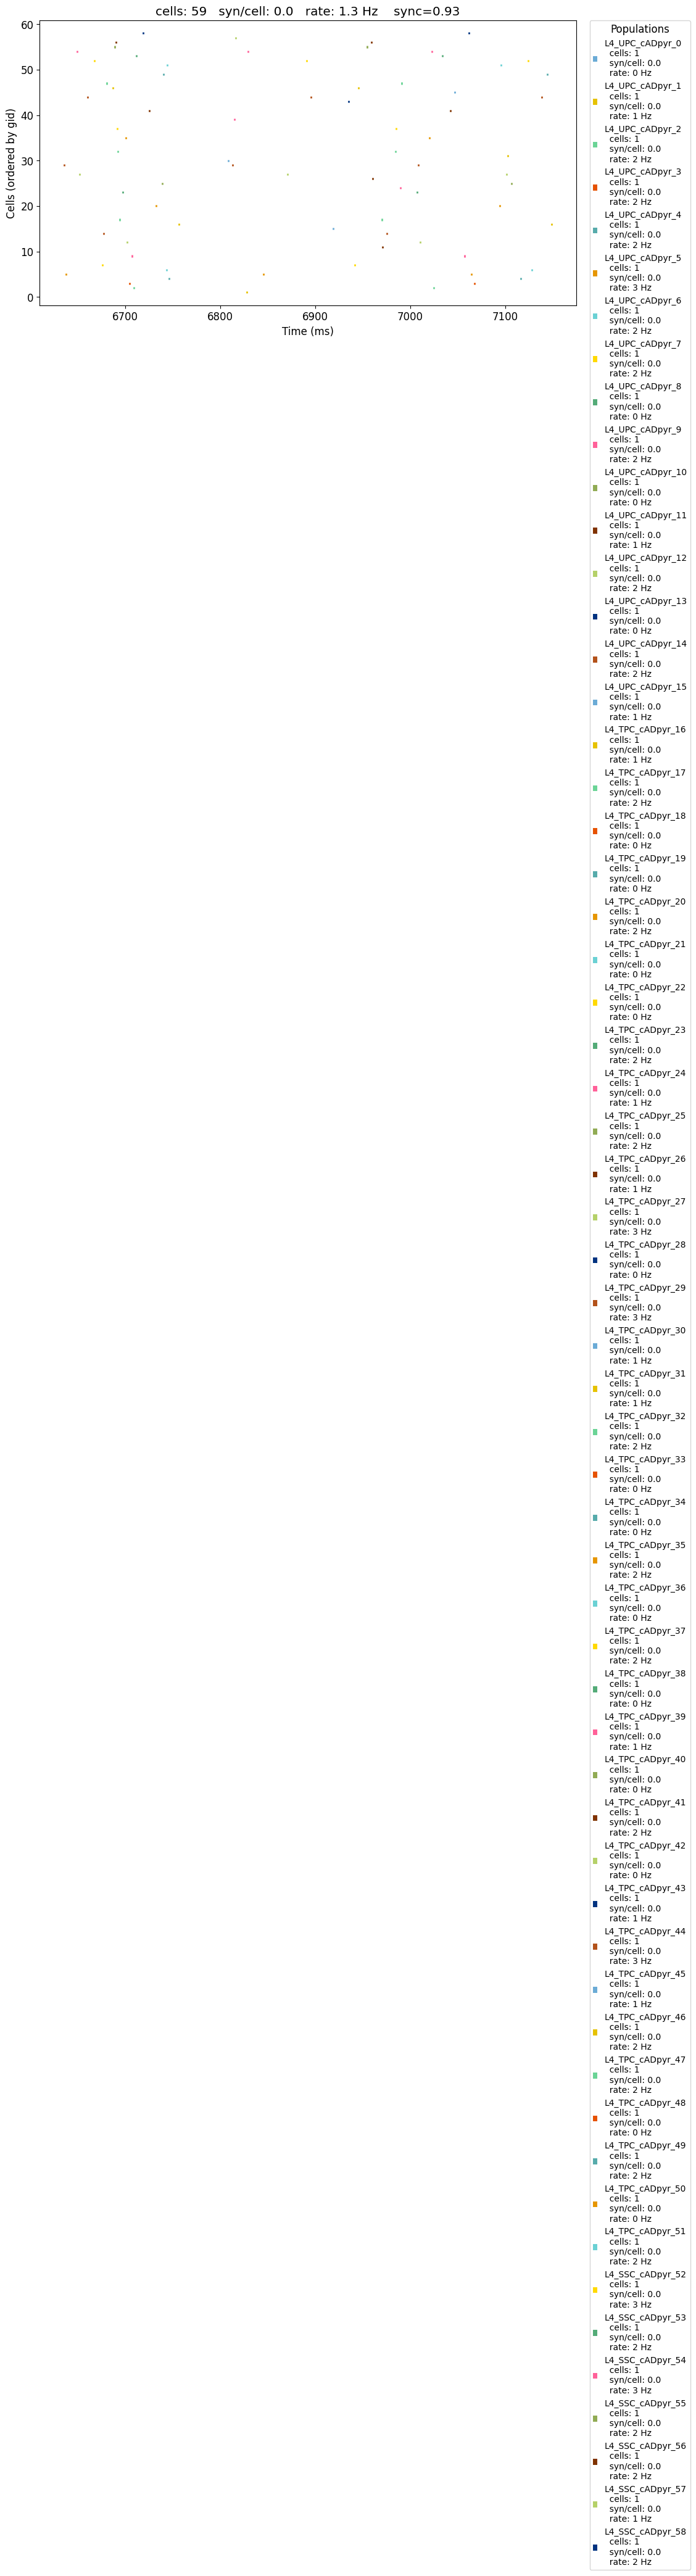

In [109]:
sim.analysis.plotRaster(timeRange=[6500,7500], figSize=(18,6), popRates=True);

Plotting recorded cell traces ... trace


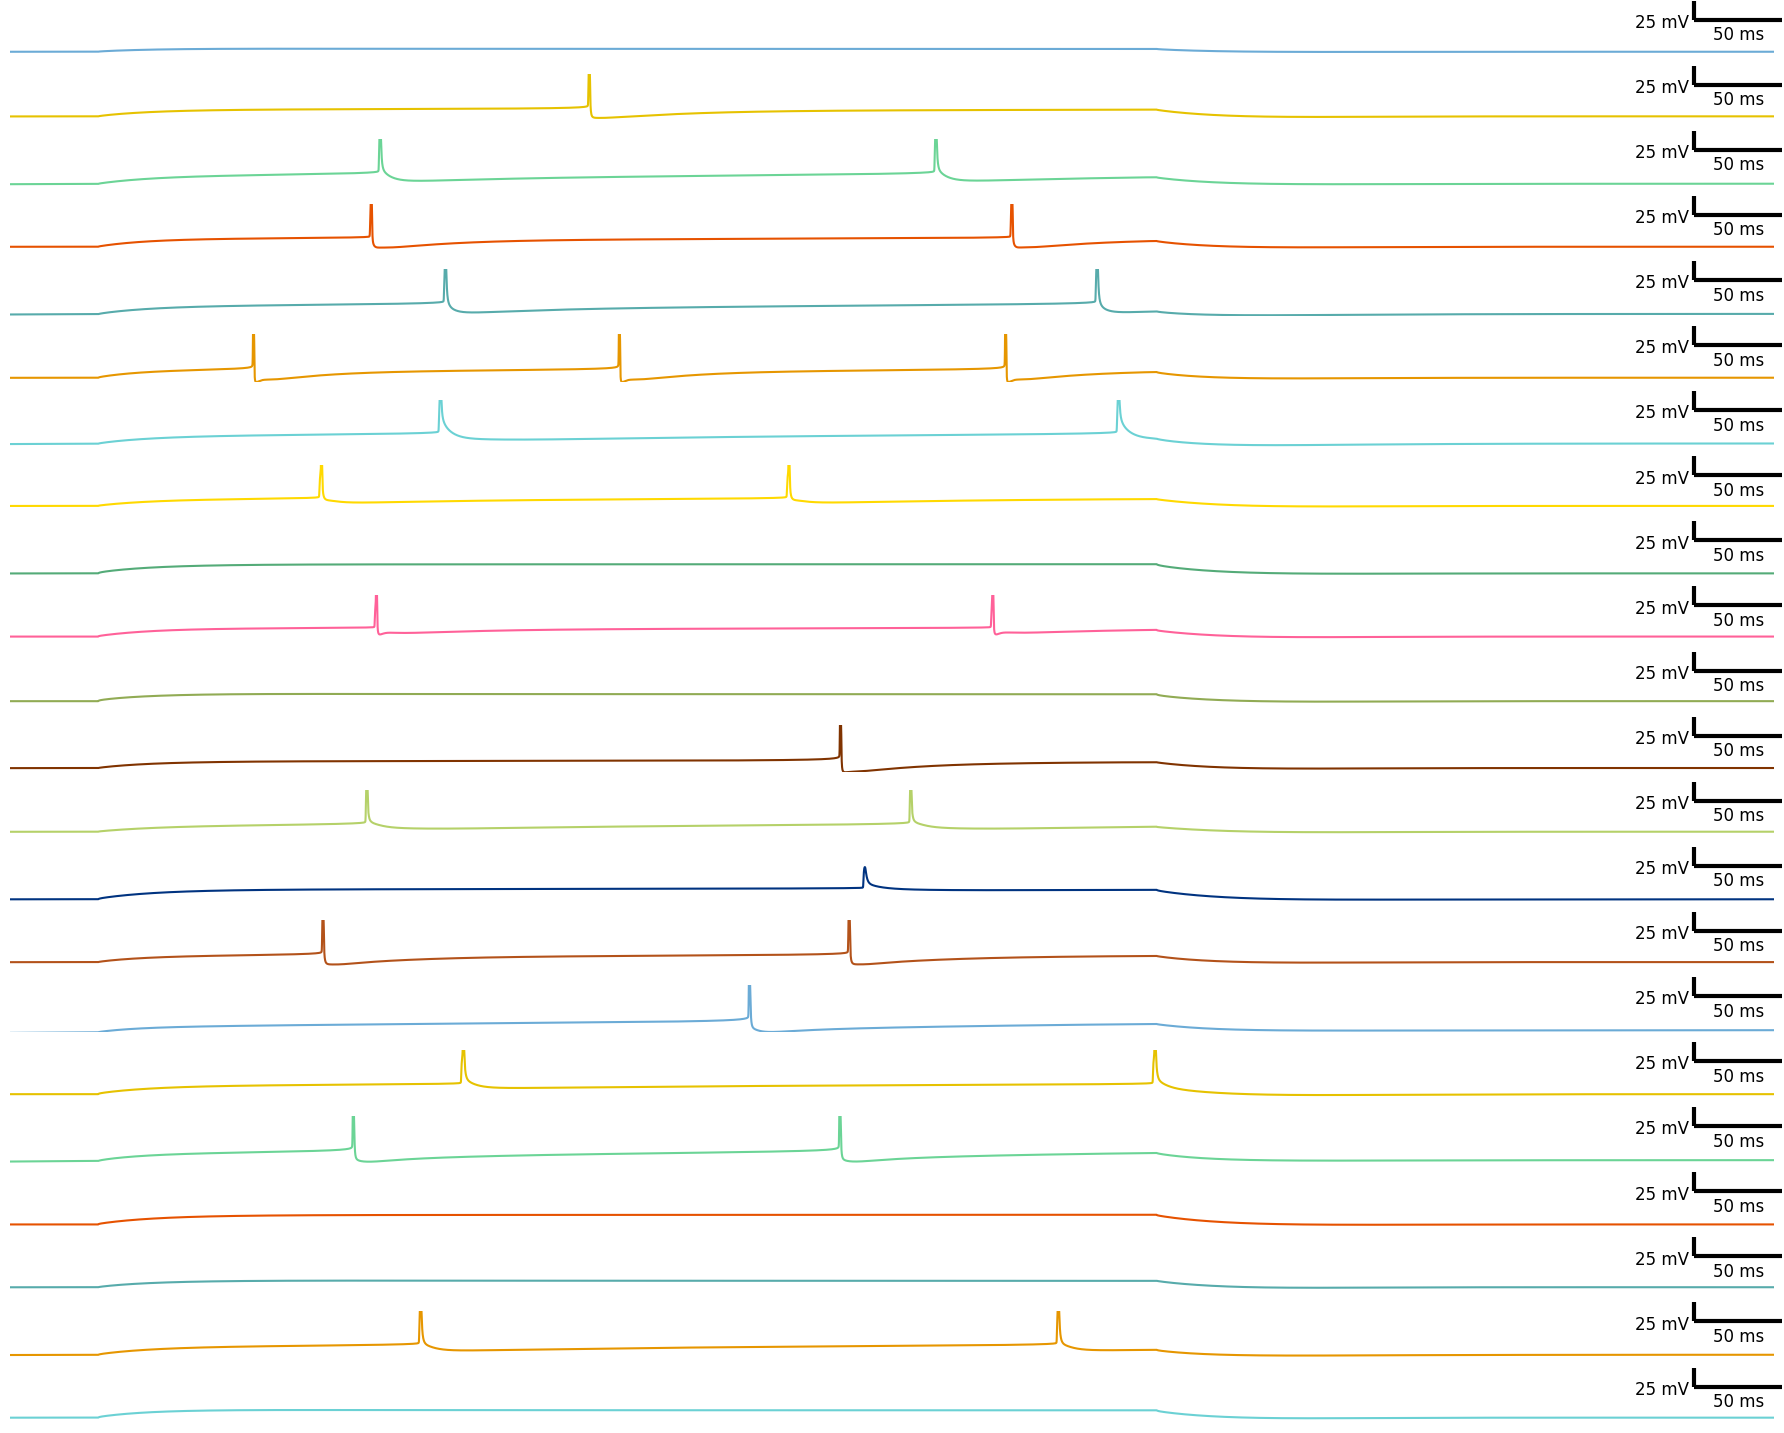

In [104]:
sim.analysis.plotTraces(include= [ii for ii in range(22)], timeRange=[6500,7500], ylim=[-82, -20], axis=False, subtitles=False, legend=False, overlay=False, oneFigPer='trace', figSize=(18,14.5));

Plotting recorded cell traces ... trace


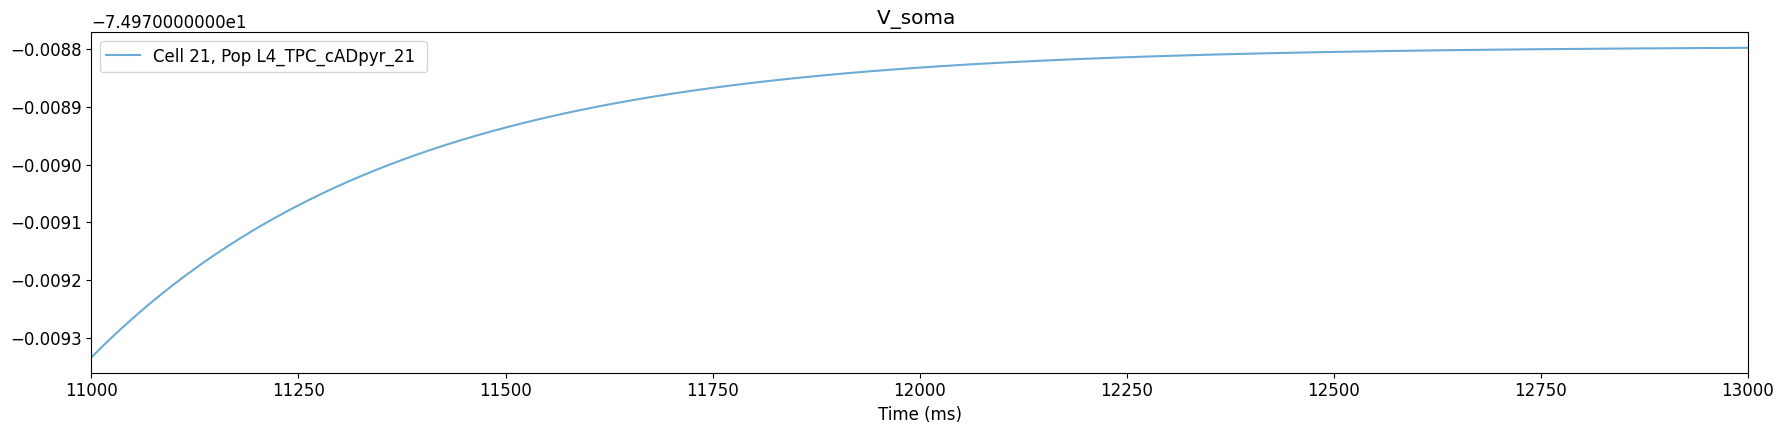

In [84]:
sim.analysis.plotTraces(include= [ii for ii in range(21,22)], timeRange=[11000,13000], axis=True, overlay=True, oneFigPer='trace', figSize=(18,4.5)); #, ylim=[-80, -74]

In [ ]:
    # for i,current1 in enumerate([-0.100, -0.060, 0.060, 0.070, 0.100, 0.200, current1+holding_current1, current1, 0.010, -0.100]):
    #     netParams.stimSourceParams['Input_'+str(gid)+'_'+str(i)] = {'type': 'IClamp', 'del': 550.0 + i*1000.0, 'dur': 600.0, 'amp': current1}
    #     netParams.stimTargetParams['Input->'+str(gid)+'_'+str(i)] = {'source': 'Input_'+str(gid)+'_'+str(i), 'sec':'soma_0', 'loc': 0.5, 'conds': {'pop':popName1}}

Plotting recorded cell traces ... trace


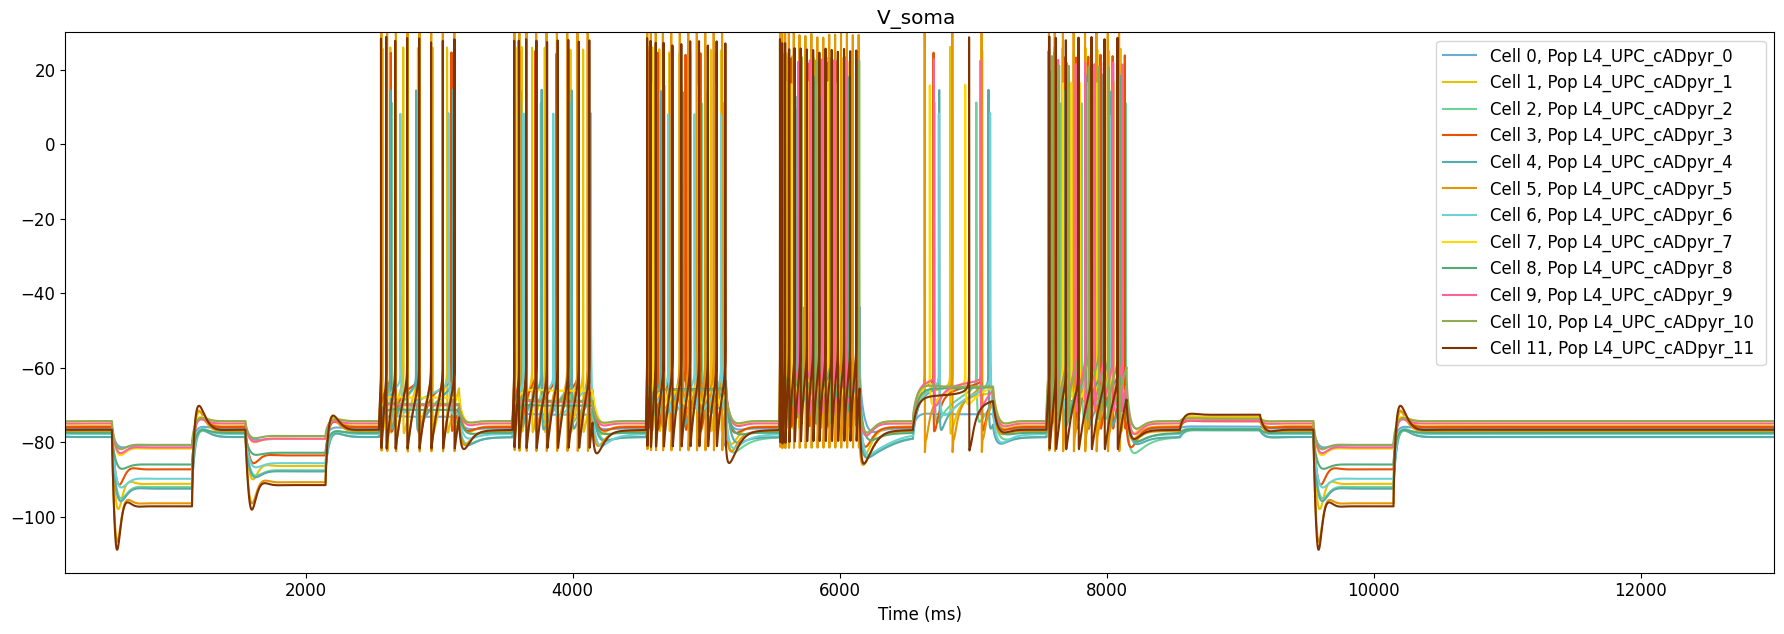

In [86]:
sim.analysis.plotTraces(include= [ii for ii in range(12)], timeRange=[200,cfg.duration], ylim=[-115, 30], axis=True, overlay=True, oneFigPer='trace', figSize=(18,6.5));

# NetPyNE simulation from "cells_info_data.json" - 12 cells

In [28]:
"""
cfg.py

High-level specifications for S1-thalamus network model using NetPyNE

Contributors: salvadordura@gmail.com, fernandodasilvaborges@gmail.com

# edges files not inclued in https://github.com/FernandoSBorges/
"""

from netpyne import specs
import json
import os
import numpy as np

%matplotlib inline

cfg = specs.SimConfig()

#------------------------------------------------------------------------------
#
# SIMULATION CONFIGURATION
#
#------------------------------------------------------------------------------

cfg.coreneuron = False

#------------------------------------------------------------------------------
# Select nodes to simulate
#------------------------------------------------------------------------------

f = open('cells_info_data.json')

Lista = json.load(f)

print(Lista)

cfg.hoclist = Lista["hoclist"]
cfg.Morpholist = Lista["Morpholist"]
cfg.gid_list = Lista["gid_list"]
# cfg.cellName_list = Lista["cellName_list"]
# cfg.cellsList = Lista["cellsList"]

cfg.Epops = []
cfg.Ipops = []

cfg.cellNumber = {}
cfg.popLabel = {}
cfg.popNumber = {}

cfg.cellNumber['L4_BP_cNAC_0'] = 1
cfg.cellNumber['L4_BTC_cNAC_1'] = 1
cfg.cellNumber['L4_NBC_cNAC_2'] = 1
cfg.cellNumber['L4_SSC_cADpyr_3'] = 1
cfg.cellNumber['L4_TPC_cADpyr_4'] = 1
cfg.cellNumber['L4_TPC_cADpyr_5'] = 1
cfg.cellNumber['L4_UPC_cADpyr_6'] = 1

for cellName in sorted(cfg.gid_list.keys()):

    if 'cADpyr' in cellName:
        cfg.Epops.append(cellName)
    else:
        cfg.Ipops.append(cellName)

    cfg.popLabel[cellName] = cellName # No cell diversity in NetPyNE
    cfg.popNumber[cellName] = cfg.cellNumber[cellName]


print(cfg.cellNumber)
print(cfg.popNumber)



{'hoclist': {'108767': 'cNAC_L6NGC', '141766': 'cNAC_L6NGC', '138433': 'cNAC_L6NGC', '141369': 'cADpyr_L4TPC', '129252': 'cADpyr_L4TPC', '133426': 'cADpyr_L4TPC', '114284': 'cADpyr_L4UPC'}, 'Morpholist': {'108767': 'rp140319_ChC_3_idA_-_Scale_x1.000_y0.950_z1.000_-_Clone_1.asc', '141766': 'rp110127_L5-2_idG_-_Scale_x1.000_y0.950_z1.000.asc', '138433': 'rp110131_L5-1_idA_-_Scale_x1.000_y1.025_z1.000_-_Clone_0.asc', '141369': 'dend-rp120608_P_3_idD_axon-sm100429a1-5_INT_idG_-_Scale_x1.000_y1.050_z1.000_-_Clone_0.asc', '129252': 'dend-mtC050800E_idD_axon-sm100429a1-5_INT_idD_-_Scale_x1.000_y1.050_z1.000_-_Clone_0.asc', '133426': 'dend-mtC050800E_idD_axon-sm100429a1-5_INT_idD_-_Scale_x1.000_y0.975_z1.000_-_Clone_0.asc', '114284': 'dend-rp120803_P_1_idB_axon-C031097B-P3_-_Scale_x1.000_y0.975_z1.000_-_Clone_0.asc'}, 'gid_list': {'L4_BP_cNAC_0': 108767, 'L4_BTC_cNAC_1': 141766, 'L4_NBC_cNAC_2': 138433, 'L4_SSC_cADpyr_3': 141369, 'L4_TPC_cADpyr_4': 129252, 'L4_TPC_cADpyr_5': 133426, 'L4_UPC_cA

In [29]:
#------------------------------------------------------------------------------
# Run parameters
#------------------------------------------------------------------------------
cfg.duration = 7.0*1e3 ## Duration of the sim, in ms
cfg.dt = 0.05
cfg.seeds = {'cell': 4321, 'conn': 4321, 'stim': 1000, 'loc': 4321}
cfg.hParams = {'celsius': 34, 'v_init': -84.0}
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True
cfg.cvode_active = False
cfg.cvode_atol = 1e-6
cfg.cache_efficient = True
cfg.printRunTime = 0.1

cfg.includeParamsLabel = False
cfg.printPopAvgRates = True
cfg.checkErrors = False

#--------------------------------------------------------------------------
# Recording
#--------------------------------------------------------------------------
cfg.allpops = cfg.Epops + cfg.Ipops
cfg.recordCells = cfg.allpops # record all cells
cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'},
                    # 'V_axon_0': {'sec':'axon_0', 'loc':0.5, 'var':'v'},
                    # 'V_apic_0': {'sec':'apic_0', 'loc':0.5, 'var':'v'},
                    # 'V_dend_0': {'sec':'dend_0', 'loc':0.5, 'var':'v'},
                    }
cfg.recordStim = False
cfg.recordTime = False
cfg.recordStep = 0.05

#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.simLabel = 'v0_batch0'       #   + str(cfg.cynradNumber)
cfg.saveFolder = 'data/'+cfg.simLabel
# cfg.filename =                	## Set file output name
cfg.savePickle = True	        	## Save pkl file
cfg.saveJson = False           	## Save json file
cfg.saveDataInclude = ['simData', 'simConfig', 'net', 'netParams'] ## ['simData'] ##  ['simData'] ##, , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##
cfg.gatherOnlySimData = False	##
cfg.saveCellSecs = True
cfg.saveCellConns = True

#------------------------------------------------------------------------------
# Analysis and plotting
# ------------------------------------------------------------------------------
cfg.analysis['plotTraces'] = {'include': cfg.recordCells, 'oneFigPer': 'cell', 'overlay': True, 'timeRange': [400,1200], 'ylim': [-100,50], 'saveFig': False,
                              'showFig': False, 'figSize':(12,3)}
cfg.analysis['plotRaster'] = {'saveFig': False, 'showFig': False, 'orderInverse': True, 'timeRange': [500,1100], 'figSize': (12,5), 'popRates': True,
                              'fontSize':12, 'markerSize':4, 'marker': 'o', 'dpi': 100}


In [30]:
"""
netParams.py

High-level specifications for S1-thalamus network model using NetPyNE

Contributors: salvadordura@gmail.com, fernandodasilvaborges@gmail.com
"""

netParams = specs.NetParams()   # object of class NetParams to store the network parameters

#------------------------------------------------------------------------------
#
# NETWORK PARAMETERS
#
#------------------------------------------------------------------------------
for cellName in cfg.gid_list.keys():

        gid = cfg.gid_list[cellName]
        MorphoName = cfg.Morpholist[str(gid)]
        hocName = cfg.hoclist[str(gid)]
        MorphologyPath = 'O1_data_physiology/morphologies/ascii'

        print(cellName,hocName)

        cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=True,
            conds={'cellType': cellName, 'cellModel': 'HH_full'},
            fileName='O1_data_physiology/emodels_hoc/' + hocName + '.hoc',
            cellName=hocName,
            cellInstance = False,
            cellArgs=[gid, MorphologyPath, MorphoName])


        axon_pt3d_x, axon_pt3d_y, axon_pt3d_z, soma_pt3d_diam =  netParams.cellParams[cellName]['secs']['soma_0']['geom']['pt3d'][-1]

        netParams.cellParams[cellName]['secs']['axon_0']['geom']['diam'] = 1.0
        # netParams.cellParams[cellName]['secs']['axon_0']['geom']['L'] = 30.0

        axon_pt3d_diam =  netParams.cellParams[cellName]['secs']['axon_0']['geom']['diam']
        axon_pt3d_L =  netParams.cellParams[cellName]['secs']['axon_0']['geom']['L']

        netParams.cellParams[cellName]['secs']['axon_0']['geom']['pt3d'] = [(axon_pt3d_x, axon_pt3d_y, axon_pt3d_z, axon_pt3d_diam),
                                                                                    (axon_pt3d_x, axon_pt3d_y+axon_pt3d_L/2.0, axon_pt3d_z, axon_pt3d_diam),
                                                                                    (axon_pt3d_x, axon_pt3d_y+axon_pt3d_L, axon_pt3d_z, axon_pt3d_diam)]


        axon1_pt3d_x, axon1_pt3d_y, axon1_pt3d_z, axon_0_pt3d_diam =  netParams.cellParams[cellName]['secs']['axon_0']['geom']['pt3d'][-1]

        # netParams.cellParams[cellName]['secs']['axon_1']['geom']['diam'] = 0.5
        # netParams.cellParams[cellName]['secs']['axon_1']['geom']['L'] = 30.0

        axon1_pt3d_diam =  netParams.cellParams[cellName]['secs']['axon_1']['geom']['diam']
        axon1_pt3d_L =  netParams.cellParams[cellName]['secs']['axon_1']['geom']['L']

        netParams.cellParams[cellName]['secs']['axon_1']['geom']['pt3d'] = [(axon1_pt3d_x, axon1_pt3d_y, axon1_pt3d_z, axon1_pt3d_diam),
                                                                                    (axon1_pt3d_x, axon1_pt3d_y+axon1_pt3d_L/2.0, axon1_pt3d_z, axon1_pt3d_diam),
                                                                                    (axon1_pt3d_x, axon1_pt3d_y+axon1_pt3d_L, axon1_pt3d_z, axon1_pt3d_diam)]


        myelin_pt3d_x, myelin_pt3d_y, myelin_pt3d_z, axon_1_pt3d_diam =  netParams.cellParams[cellName]['secs']['axon_1']['geom']['pt3d'][-1]

        # netParams.cellParams[cellName]['secs']['myelin_0']['geom']['diam'] = 0.5
        netParams.cellParams[cellName]['secs']['myelin_0']['geom']['L'] = 100.0

        myelin_pt3d_diam =  netParams.cellParams[cellName]['secs']['myelin_0']['geom']['diam']
        myelin_pt3d_L =  netParams.cellParams[cellName]['secs']['myelin_0']['geom']['L']

        netParams.cellParams[cellName]['secs']['myelin_0']['geom']['pt3d'] = [(myelin_pt3d_x, myelin_pt3d_y, myelin_pt3d_z, myelin_pt3d_diam),
                                                                                    (myelin_pt3d_x, myelin_pt3d_y+myelin_pt3d_L/2.0, myelin_pt3d_z, myelin_pt3d_diam),
                                                                                    (myelin_pt3d_x, myelin_pt3d_y+myelin_pt3d_L, myelin_pt3d_z, myelin_pt3d_diam)]


# https://github.com/suny-downstate-medical-center/S1_mouse
# Layer	     height	  from	  to
# L1         0.089      0.000	0.089
# L2         0.070      0.089	0.159
# L3         0.128      0.159	0.286
# L4         0.134      0.286	0.421
# L5         0.263      0.421	0.684
# L6         0.316      0.684	1.000
# L23        0.198      0.089	0.286
# All     1378.8 um

layer = {'1':[0.0, 0.089], '2': [0.089,0.159], '3': [0.159,0.309], '23': [0.089,0.309], '4':[0.309,0.418], '5': [0.418,0.684], '6': [0.684,1.0],
'longS1': [2.2,2.3], 'longS2': [2.3,2.4]}  # normalized layer boundaries

#Th pop
ymin={'ss_RTN_o': 1688, 'ss_RTN_m': 1766, 'ss_RTN_i': 1844, 'VPL_sTC': 2000, 'VPM_sTC': 2156, 'POm_sTC_s1': 2312}
ymax={'ss_RTN_o': 1766, 'ss_RTN_m': 1844, 'ss_RTN_i': 2000, 'VPL_sTC': 2156, 'VPM_sTC': 2312, 'POm_sTC_s1': 2624}

#------------------------------------------------------------------------------
# General network parameters
#------------------------------------------------------------------------------
netParams.scale = 1.0 # Scale factor for number of cells
netParams.sizeX = 200.0 # x-dimension (horizontal length) size in um
netParams.sizeY = 2080.0 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 200.0 # z-dimension (horizontal depth) size in um
netParams.shape = 'cylinder' # cylindrical (column-like) volume
netParams.rotateCellsRandomly = True

netParams.defaultThreshold = -20.0 # spike threshold, 10 mV is NetCon default, lower it for all cells
netParams.defaultDelay = 0.1 # default conn delay (ms)
netParams.propVelocity = 300.0 #  300 μm/ms (Stuart et al., 1997)
netParams.scaleConnWeightNetStims = 0.001  # weight conversion factor (from nS to uS)

#------------------------------------------------------------------------------
# S1 pop
#------------------------------------------------------------------------------
for cellName in netParams.cellParams.keys():
    layernumber = cellName[1:2]
    if layernumber == '2':
        netParams.popParams[cellName] = {'cellType': cellName, 'cellModel': 'HH_full', 'ynormRange': layer['23'],  'numCells':cfg.cellNumber[cellName]}
    else:
        netParams.popParams[cellName] = {'cellType': cellName, 'cellModel': 'HH_full', 'ynormRange': layer[layernumber], 'numCells': cfg.cellNumber[cellName]}


L4_BP_cNAC_0 cNAC_L6NGC
L4_BTC_cNAC_1 cNAC_L6NGC
L4_NBC_cNAC_2 cNAC_L6NGC
L4_SSC_cADpyr_3 cADpyr_L4TPC
L4_TPC_cADpyr_4 cADpyr_L4TPC
L4_TPC_cADpyr_5 cADpyr_L4TPC
L4_UPC_cADpyr_6 cADpyr_L4UPC


In [31]:
cfg.gid_list

{'L4_BP_cNAC_0': 108767,
 'L4_BTC_cNAC_1': 141766,
 'L4_NBC_cNAC_2': 138433,
 'L4_SSC_cADpyr_3': 141369,
 'L4_TPC_cADpyr_4': 129252,
 'L4_TPC_cADpyr_5': 133426,
 'L4_UPC_cADpyr_6': 114284}

In [39]:
#------------------------------------------------------------------------------
# Current inputs
#------------------------------------------------------------------------------
# cfg.addIClamp = True  # decrease the transient

# cfg.IClamp = []
# cfg.IClampnumber = 0

# for pop in cfg.Epops:
#   cfg.IClamp.append({'pop': pop, 'sec': 'soma', 'loc': 0.5, 'start': 550, 'dur': 600, 'amp': 0.2}) #pA
#   cfg.IClampnumber=cfg.IClampnumber+1

# for pop in cfg.Ipops:
#   cfg.IClamp.append({'pop': pop, 'sec': 'soma', 'loc': 0.5, 'start': 550, 'dur': 600, 'amp': 0.6}) #pA
#   cfg.IClampnumber=cfg.IClampnumber+1


# for pop in cfg.Epops:
#   cfg.IClamp.append({'pop': pop, 'sec': 'soma', 'loc': 0.5, 'start': 0, 'dur': 2000, 'amp': 0.05}) #pA
#   cfg.IClampnumber=cfg.IClampnumber+1

# for pop in cfg.Ipops:
#   cfg.IClamp.append({'pop': pop, 'sec': 'soma', 'loc': 0.5, 'start': 0, 'dur': 2000, 'amp': 0.05}) #pA
#   cfg.IClampnumber=cfg.IClampnumber+1

for cellName in cfg.gid_list.keys():

    gid = cfg.gid_list[cellName]
    popName1 = cellName

# for gid in node_gid: # list_pre:

    # popName1 = cellName_list[gid]
    # current1 = 1.0*cells.get(gid,['@dynamics:threshold_current']).values[0]
    # holding_current1 = cells.get(gid,['@dynamics:holding_current']).values[0]

    # netParams.stimSourceParams['Input_'+str(gid)] = {'type': 'IClamp', 'del': 0.0, 'dur': 10000.0, 'amp': holding_current1}
    # netParams.stimTargetParams['Input->'+str(gid)] = {'source': 'Input_'+str(gid), 'sec':'soma_0', 'loc': 0.5, 'conds': {'pop':popName1}}

    # for i,current1 in enumerate([0.9*cells.get(gid,['@dynamics:threshold_current']).values[0], 0.95*cells.get(gid,['@dynamics:threshold_current']).values[0]]):
    #     netParams.stimSourceParams['Input_'+str(gid)+'_'+str(i)] = {'type': 'IClamp', 'del': 550.0 + i*1000.0, 'dur': 600.0, 'amp': current1}
    #     netParams.stimTargetParams['Input->'+str(gid)+'_'+str(i)] = {'source': 'Input_'+str(gid)+'_'+str(i), 'sec':'soma_0', 'loc': 0.5, 'conds': {'pop':popName1}}

    iV70 = (-72.0 - nodesinfo['@dynamics:resting_potential'][gid])/nodesinfo['@dynamics:input_resistance'][gid]

    print("%.3f %.3f %.3f" % (iV70, nodesinfo['@dynamics:threshold_current'][gid]+nodesinfo['@dynamics:holding_current'][gid],nodesinfo['@dynamics:resting_potential'][gid]))

    netParams.stimSourceParams['Input_'+str(gid)] = {'type': 'IClamp', 'del': 200.0, 'dur': 10000.0, 'amp': iV70}
    netParams.stimTargetParams['Input->'+str(gid)] = {'source': 'Input_'+str(gid), 'sec':'soma_0', 'loc': 0.5, 'conds': {'pop':popName1}}

    for i,current1 in enumerate([-0.100, 0.030, 0.060, 0.070, 0.100, 0.200]):
        netParams.stimSourceParams['Input_'+str(gid)+'_'+str(i)] = {'type': 'IClamp', 'del': 550.0 + i*1000.0, 'dur': 600.0, 'amp': current1}
        netParams.stimTargetParams['Input->'+str(gid)+'_'+str(i)] = {'source': 'Input_'+str(gid)+'_'+str(i), 'sec':'soma_0', 'loc': 0.5, 'conds': {'pop':popName1}}
#------------------------------------------------------------------------------
# Current inputs (IClamp)
#------------------------------------------------------------------------------
# if cfg.addIClamp:
#      for j in range(cfg.IClampnumber):
#         key ='IClamp'
#         params = getattr(cfg, key, None)
#         key ='IClamp'+str(j+1)
#         params = params[j]
#         [pop,sec,loc,start,dur,amp] = [params[s] for s in ['pop','sec','loc','start','dur','amp']]

#         # add stim source
#         netParams.stimSourceParams[key] = {'type': 'IClamp', 'delay': start, 'dur': dur, 'amp': amp}

#         # connect stim source to target
#         netParams.stimTargetParams[key+'_'+pop] =  {
#             'source': key,
#             'conds': {'pop': pop},
#             'sec': sec,
#             'loc': loc}

0.014 0.026 -75.152
0.011 0.025 -74.293
0.016 0.044 -74.150
0.031 0.036 -79.190
0.039 0.058 -77.321
0.039 0.059 -77.228
0.045 0.113 -75.187


In [40]:
from netpyne import sim

sim.initialize(
    simConfig = cfg,
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations
sim.net.createCells()              			# instantiate network cells based on defined populations
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)
sim.runSim()                      			# run parallel Neuron simulation


Start time:  2025-07-04 16:15:36.372120

Creating network of 7 cell populations on 1 hosts...
  Number of cells on node 0: 7 
  Done; cell creation time = 0.20 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 49 
  Done; cell stims creation time = 0.00 s.
Recording 7 traces of 1 types on node 0
0.0s

Running simulation using NEURON for 7000.0 ms...
0.1s
0.2s
0.3s
0.4s
0.5s
0.6s
0.7s
0.8s
0.9s
1.0s
1.1s
1.2s
1.3s
1.4s
1.5s
1.6s
1.7s
1.8s
1.9s
2.0s
2.1s
2.2s
2.3s
2.4s
2.5s
2.6s
2.7s
2.8s
2.9s
3.0s
3.1s
3.2s
3.3s
3.4s
3.5s
3.6s
3.7s
3.8s
3.9s
4.0s
4.1s
4.2s
4.3s
4.4s
4.5s
4.6s
4.7s
4.8s
4.9s
5.0s
5.1s
5.2s
5.3s
5.4s
5.5s
5.6s
5.7s
5.8s
5.9s
6.0s
6.1s
6.2s
6.3s
6.4s
6.5s
6.6s
6.7s
6.8s
6.9s
7.0s
  Done; run time = 72.83 s; real-time ratio: 0.10.


In [41]:
sim.gatherData();                  			# gather spiking data and cell info from each node
# sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
# sim.analysis.plotData()         			# plot spike raster etc


Gathering data...
  Done; gather time = 0.19 s.

Analyzing...
  Cells: 7
  Connections: 0 (0.00 per cell)
  Spikes: 428 (8.73 Hz)
  Simulated time: 7.0 s; 1 workers
  Run time: 72.83 s
   L4_BP_cNAC_0 : 8.714 Hz
   L4_BTC_cNAC_1 : 19.000 Hz
   L4_NBC_cNAC_2 : 17.571 Hz
   L4_SSC_cADpyr_3 : 5.000 Hz
   L4_TPC_cADpyr_4 : 4.286 Hz
   L4_TPC_cADpyr_5 : 4.286 Hz
   L4_UPC_cADpyr_6 : 2.286 Hz


Preparing spike data...
Plotting raster...


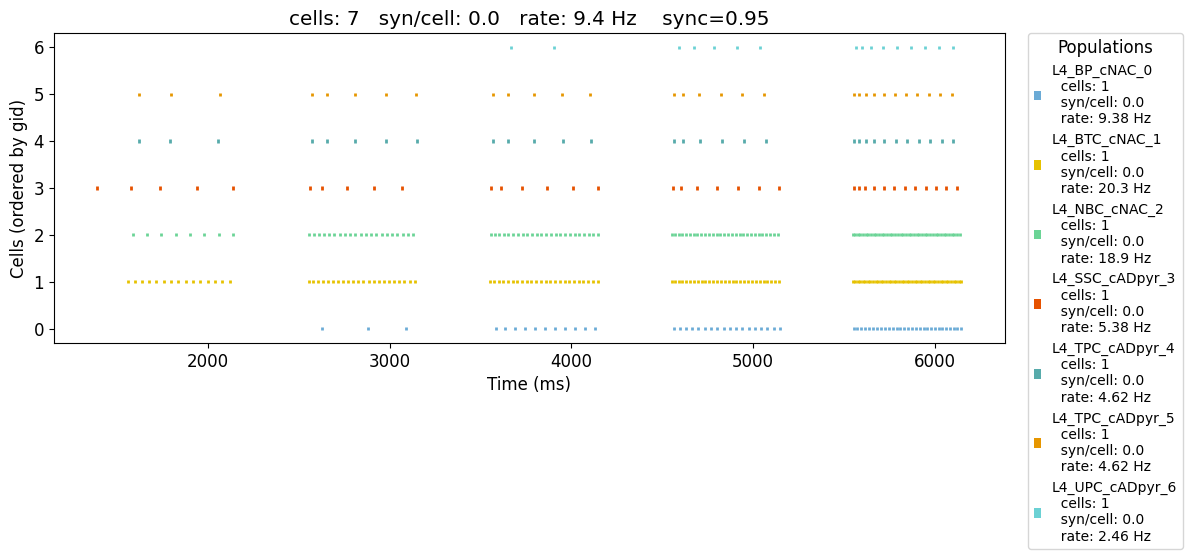

In [60]:
sim.analysis.plotRaster(include=cfg.Epops+cfg.Ipops, timeRange=[500,7000], figSize=(12,5), popRates=True);

Plotting recorded cell traces ... trace


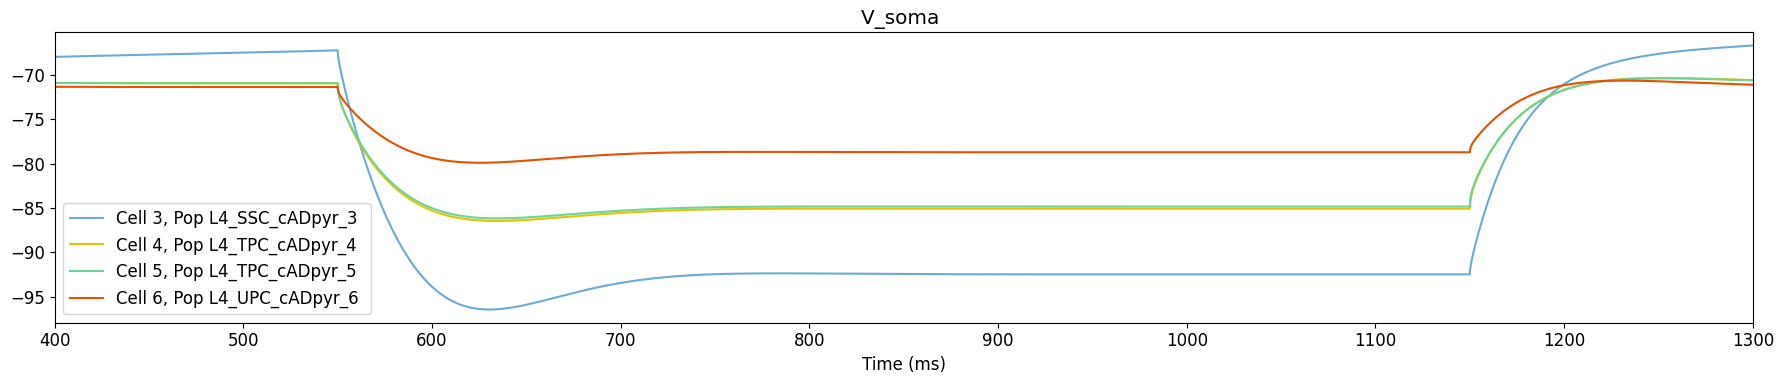

Plotting recorded cell traces ... trace


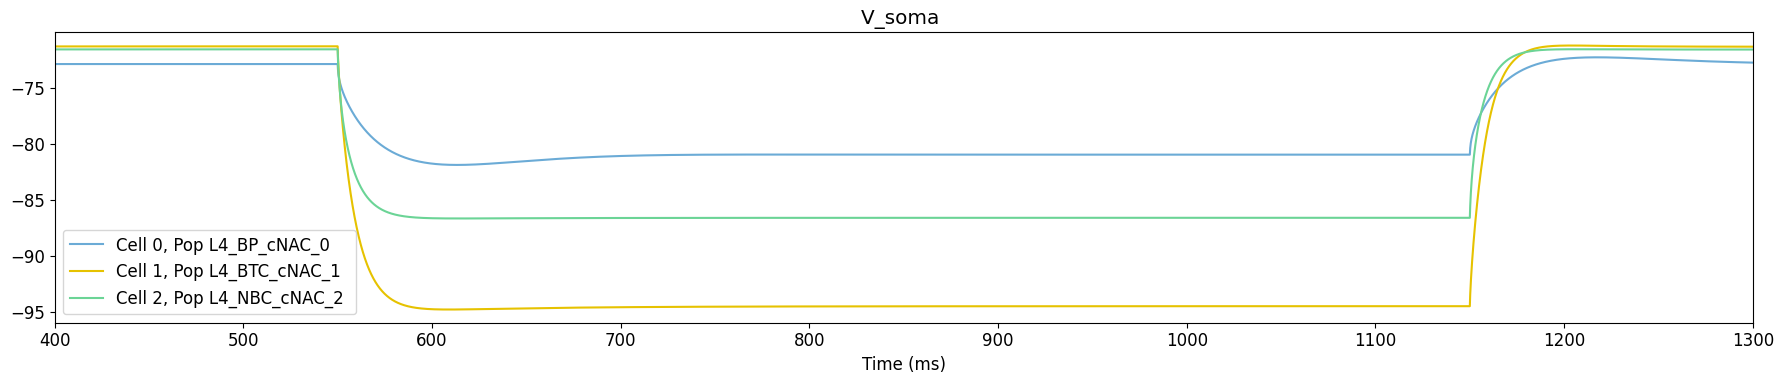

In [59]:
sim.analysis.plotTraces(include=cfg.Epops, timeRange=[400,1300], overlay=True, oneFigPer= 'trace', figSize=(18,4));
sim.analysis.plotTraces(include=cfg.Ipops, timeRange=[400,1300], overlay=True, oneFigPer= 'trace', figSize=(18,4));

Plotting recorded cell traces ... cell


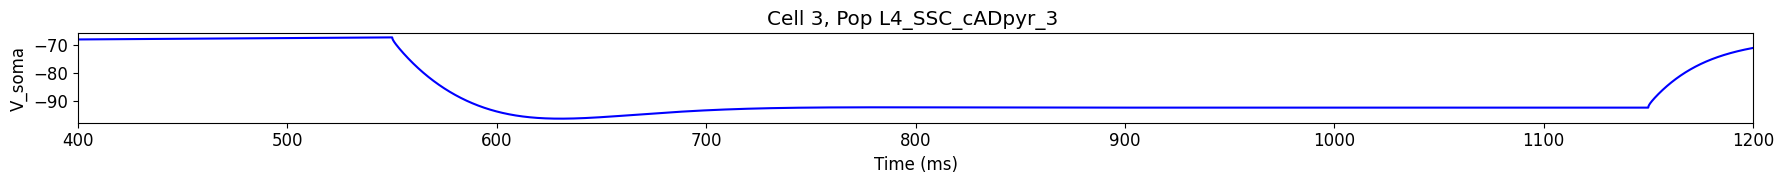

Plotting recorded cell traces ... cell


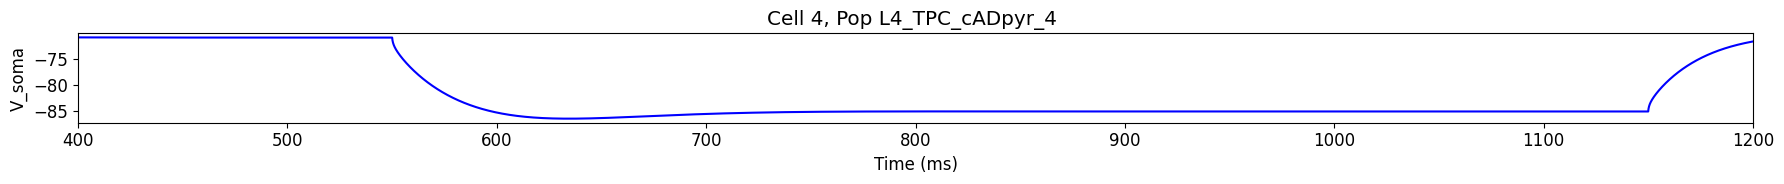

Plotting recorded cell traces ... cell


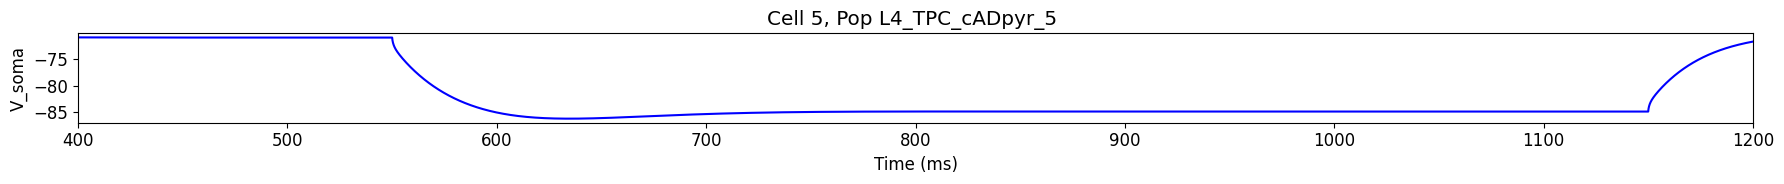

Plotting recorded cell traces ... cell


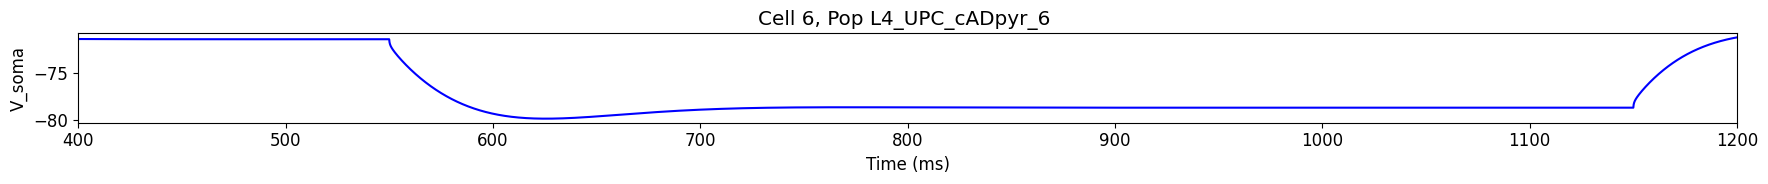

Plotting recorded cell traces ... cell


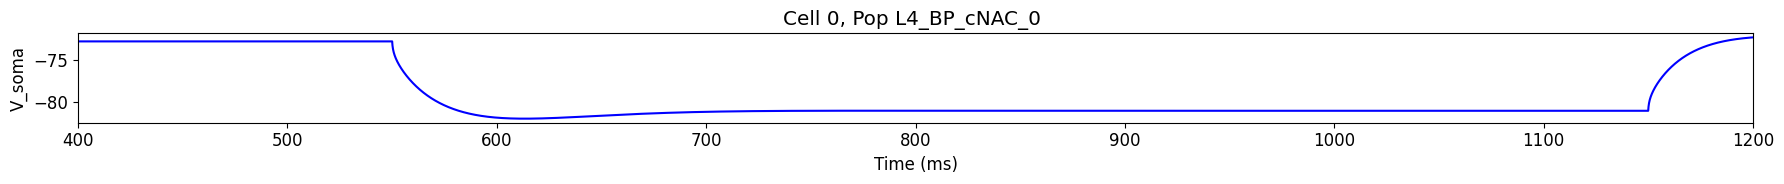

Plotting recorded cell traces ... cell


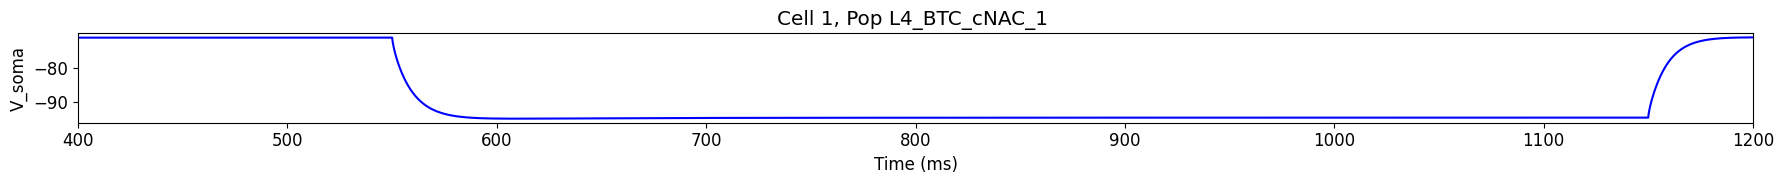

Plotting recorded cell traces ... cell


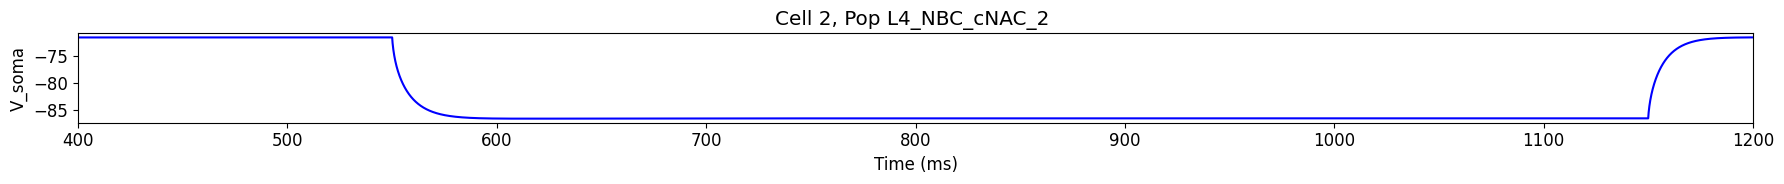

In [45]:
for pop in cfg.Epops+cfg.Ipops:
  sim.analysis.plotTraces(include=[pop], timeRange=[400,1200], overlay=False, oneFigPer='cell', figSize=(18,2));

# Load recordings

In [23]:
# pip install openpyxl

In [46]:
import pandas as pd

excel_file_path = "Spike_trains_steps_L4_elife_Aric.xlsx"

df_rs = pd.read_excel(excel_file_path, sheet_name="RS")
df_fs = pd.read_excel(excel_file_path, sheet_name="FS")
df_rip = pd.read_excel(excel_file_path, sheet_name="Ripplets")

print("DataFrame for sheet 'RS':")
print(df_rs.head())
print("\nDataFrame for sheet 'FS':")
print(df_fs.head())
print("\nDataFrame for sheet 'Ripplets':")
print(df_rip.head())

DataFrame for sheet 'RS':
     ms    -100      60      70     100     200
0  0.00 -71.045 -70.778 -69.588 -71.480 -70.015
1  0.05 -71.060 -70.686 -69.626 -71.648 -70.061
2  0.10 -71.037 -70.587 -69.618 -71.510 -70.007
3  0.15 -71.091 -70.686 -69.649 -71.503 -69.984
4  0.20 -71.053 -70.625 -69.687 -71.617 -70.061

DataFrame for sheet 'FS':
     ms    -320     240     280     400     600
0  0.00 -68.466 -68.558 -68.886 -69.473 -69.489
1  0.05 -68.390 -68.687 -68.848 -69.450 -69.427
2  0.10 -68.336 -68.703 -68.802 -69.550 -69.359
3  0.15 -68.466 -68.695 -68.871 -69.389 -69.328
4  0.20 -68.474 -68.550 -68.932 -69.679 -69.427

DataFrame for sheet 'Ripplets':
   031820_DFI_P41  FS 5 ms stim  Field  102920_DFI_P36  RS 2 ms stim  Field.1
0            0.00       -66.475 -0.004            0.00       -65.420   -0.046
1            0.05       -66.322 -0.011            0.05       -65.404    0.010
2            0.10       -66.269  0.011            0.10       -65.414    0.074
3            0.15       -6

In [47]:
import matplotlib.pyplot as plt

(0.0, 750.0)

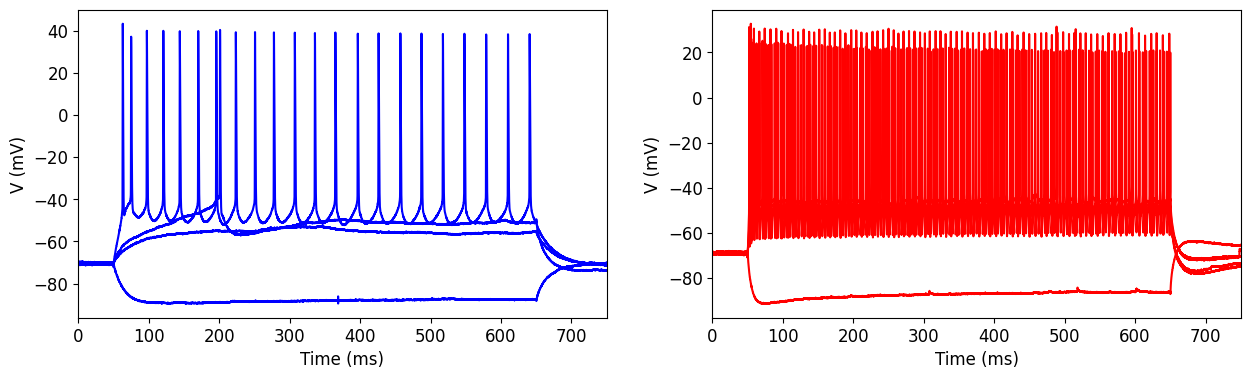

In [48]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.plot(df_rs['ms'], df_rs[-100], color='blue')
plt.plot(df_rs['ms'], df_rs[60], color='blue')
plt.plot(df_rs['ms'], df_rs[70], color='blue')
# plt.plot(df_rs['ms'], df_rs[100], color='blue')
plt.plot(df_rs['ms'], df_rs[200], color='blue')
plt.ylabel('V (mV)')
plt.xlabel('Time (ms)')
plt.xlim(0, 750)

plt.subplot(1, 2, 2)
plt.plot(df_fs['ms'], df_fs[-320], color='red')
plt.plot(df_fs['ms'], df_fs[240], color='red')
plt.plot(df_fs['ms'], df_fs[280], color='red')
plt.plot(df_fs['ms'], df_fs[400], color='red')
plt.plot(df_fs['ms'], df_fs[600], color='red')
# plt.title('FS with 200 pA step current')
# plt.plot(df_rs['ms'], list(sim.simData['V_soma']['cell_4'])[10000:10000+len(df_rs['ms'])])
# plt.plot(df_rs['ms'], list(sim.simData['V_soma']['cell_5'])[10000:10000+len(df_rs['ms'])])
plt.ylabel('V (mV)')
plt.xlabel('Time (ms)')
plt.xlim(0, 750)
# plt.ylim(-80, -65)

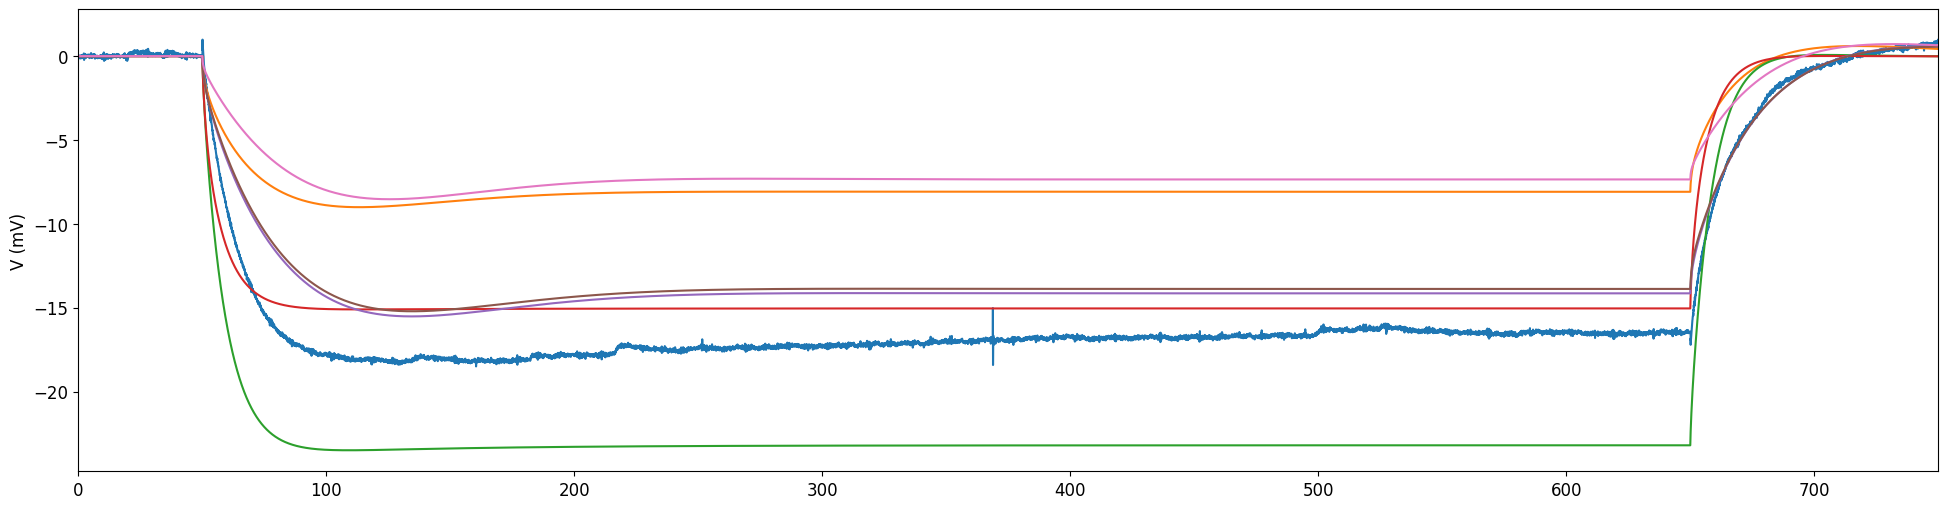

In [ ]:
# plt.figure(figsize=(24, 24))
plt.figure(figsize=(24, 6))

# plt.subplot(10, 1, 1)
plt.plot(df_rs['ms'], df_rs[-100].values - df_rs[-100].values[0])
# plt.plot(df_rs['ms'], df_rs[60])
# plt.plot(df_rs['ms'], df_rs[70])
# plt.plot(df_rs['ms'], df_rs[100])
# plt.plot(df_rs['ms'], df_rs[200])
# plt.title('RS with 200 pA step current')
plt.ylabel('V (mV)')
plt.xlim(0, 750)

for i in range(1, 8):
    if np.min(np.array(sim.simData['V_soma']['cell_'+str(i-1)])[10000:10000+len(df_rs['ms'])]-sim.simData['V_soma']['cell_'+str(i-1)][10000]) > -24:
    
    # sim.simData['V_soma']['cell_'+str(i-1)][20000]-sim.simData['V_soma']['cell_'+str(i-1)][10000] < -12 and \
    # sim.simData['V_soma']['cell_'+str(i-1)][11800]-sim.simData['V_soma']['cell_'+str(i-1)][10000] < -12:

        # plt.subplot(10, 1, i+1)
        plt.plot(df_rs['ms'], np.array(sim.simData['V_soma']['cell_'+str(i-1)])[10000:10000+len(df_rs['ms'])]-sim.simData['V_soma']['cell_'+str(i-1)][10000])
        # plt.plot(df_rs['ms'], np.array(sim.simData['V_soma']['cell_'+str(i-1)])[10000+120000:10000+120000+len(df_rs['ms'])]-sim.simData['V_soma']['cell_'+str(i-1)][10000+120000])
        plt.ylabel('V (mV)')
        plt.xlim(0, 750)


plt.show()

In [87]:
hex = 'hex0'
i = 0
for ii, gid in enumerate(node_sets['hex0']['node_id']):
    if 'L4_' in nodesinfo['mtype'][gid] and distance2Dmean(gid, mean_x, mean_y) > 0.0 and distance2Dmean(gid, mean_x, mean_y) < 25.0 and 'EXC' in nodesinfo['synapse_class'][gid]:
        i = i + 1
        # print(len(node_gid),gid,nodesinfo['synapse_class'][gid],nodesinfo['mtype'][gid],nodesinfo['model_template'][gid],nodesinfo['morphology'][gid],hex,distance2Dmean(gid, mean_x, mean_y))
        print("%d \t%d %s %s %.4f %.2f %.4f %.2f" % (i,gid,nodesinfo['synapse_class'][gid],nodesinfo['mtype'][gid], 
                                                     nodesinfo['@dynamics:threshold_current'][gid],nodesinfo['@dynamics:resting_potential'][gid],
                                                     nodesinfo['@dynamics:holding_current'][gid],nodesinfo['@dynamics:input_resistance'][gid]))
        print("%d \t%d %s %s %.4f %.2f %.4f %.2f\n" % (i,gid,nodesinfo['synapse_class'][gid],nodesinfo['mtype'][gid], 
                                                     nodesinfo['@dynamics:threshold_current'][gid],sim.simData['V_soma']['cell_'+str(i-1)][10000],
                                                     nodesinfo['@dynamics:holding_current'][gid],(sim.simData['V_soma']['cell_'+str(i-1)][20000]-sim.simData['V_soma']['cell_'+str(i-1)][10000])/(-0.100)))
                                                     

1 	109126 EXC L4_UPC 0.1281 -78.55 -0.0562 127.30
1 	109126 EXC L4_UPC 0.1281 -76.28 -0.0562 45.38

2 	109354 EXC L4_UPC 0.0788 -76.18 -0.0505 204.69
2 	109354 EXC L4_UPC 0.0788 -75.64 -0.0505 154.99

3 	109632 EXC L4_UPC 0.0970 -78.87 -0.0418 160.13
3 	109632 EXC L4_UPC 0.0970 -78.61 -0.0418 134.31

4 	112531 EXC L4_UPC 0.1311 -76.17 -0.0749 141.17
4 	112531 EXC L4_UPC 0.1311 -75.91 -0.0749 113.55

5 	112935 EXC L4_UPC 0.0928 -78.84 -0.0403 166.91
5 	112935 EXC L4_UPC 0.0928 -78.57 -0.0403 138.80

6 	113019 EXC L4_UPC 0.0576 -77.44 -0.0304 276.21
6 	113019 EXC L4_UPC 0.0576 -76.94 -0.0304 194.29

7 	113207 EXC L4_UPC 0.1163 -78.05 -0.0556 137.93
7 	113207 EXC L4_UPC 0.1163 -77.77 -0.0556 120.25

8 	113680 EXC L4_UPC 0.2364 -74.86 -0.1595 79.30
8 	113680 EXC L4_UPC 0.2364 -74.35 -0.1595 73.57

9 	114264 EXC L4_UPC 0.1887 -77.59 -0.0877 91.97
9 	114264 EXC L4_UPC 0.1887 -77.46 -0.0877 85.00

10 	114284 EXC L4_UPC 0.2849 -75.19 -0.1723 70.51
10 	114284 EXC L4_UPC 0.2849 -74.96 -0.1723 64

### Ultra Fast Ripples

(0.0, 25.0)

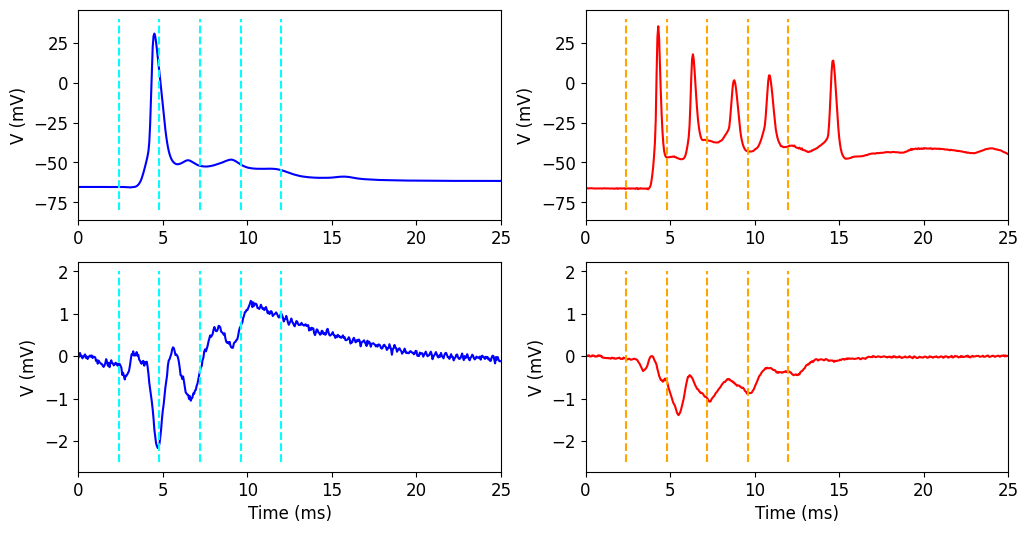

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(df_rip['102920_DFI_P36'], df_rip['RS 2 ms stim'], color='blue')
plt.vlines(x=[2.4,4.8,7.2,9.6,12.0],ymin=-80, ymax=40, colors='cyan', linestyles='dashed')
plt.ylabel('V (mV)')
plt.xlim(0, 25)
plt.subplot(2, 2, 3)
plt.plot(df_rip['102920_DFI_P36'], df_rip['Field.1'], color='blue')
plt.vlines(x=[2.4,4.8,7.2,9.6,12.0],ymin=-2.5, ymax=2, colors='cyan', linestyles='dashed')
plt.ylabel('V (mV)')
plt.xlabel('Time (ms)')
plt.xlim(0, 25)

plt.subplot(2, 2, 2)
plt.plot(df_rip['031820_DFI_P41'], df_rip['FS 5 ms stim'], color='red')
plt.vlines(x=[2.4,4.8,7.2,9.6,12.0],ymin=-80, ymax=40, colors='orange', linestyles='dashed')
plt.ylabel('V (mV)')
plt.xlim(0, 25)
plt.subplot(2, 2, 4)
plt.plot(df_rip['031820_DFI_P41'], df_rip['Field'], color='red')
plt.vlines(x=[2.4,4.8,7.2,9.6,12.0],ymin=-2.5, ymax=2, colors='orange', linestyles='dashed')
plt.ylabel('V (mV)')
plt.xlabel('Time (ms)')
plt.xlim(0, 25)